In [1]:
import pandas as pd

# Türkiye's military expenditure data from SIPRI
# Figures are in US $m., at constant 2023 prices and exchange rates
data = {
    "Year": list(range(1953, 2025)),
    "Turkey_Milex_Constant2023_USD_millions": [
        1014.2, 1025.7, 1037.3, 960.4, 892.3, 866.7, 1031.4, 1137.3, 1278.7, 1361.9,
        1399.4, 1500.8, 1572.4, 1575.7, 1697.7, 1898.0, 1840.1, 2041.1, 2338.9, 2458.3,
        2606.4, 2922.2, 5110.3, 5369.1, 5169.7, 4733.9, 4200.3, 4353.4, 4911.7, 5369.5,
        5080.5, 4938.8, 5239.6, 5887.1, 5622.4, 4952.2, 5730.0, 6923.8, 7117.5, 7486.5,
        8277.2, 8092.6, 8313.6, 9304.4, 9697.1, 10161.0, 11219.2, 10857.7, 9953.5, 10590.5,
        9848.8, 9152.5, 8821.3, 9234.0, 8903.6, 9031.8, 9664.1, 9493.1, 9574.5, 9809.5,
        10074.2, 10147.7, 10442.0, 12242.6, 13140.2, 16678.6, 17729.8, 15070.4, 15333.9, 
        16429.0, 19577.8, 21884.4
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Preview
print(df.head())
print(df.tail())

   Year  Turkey_Milex_Constant2023_USD_millions
0  1953                                  1014.2
1  1954                                  1025.7
2  1955                                  1037.3
3  1956                                   960.4
4  1957                                   892.3
    Year  Turkey_Milex_Constant2023_USD_millions
67  2020                                 15070.4
68  2021                                 15333.9
69  2022                                 16429.0
70  2023                                 19577.8
71  2024                                 21884.4


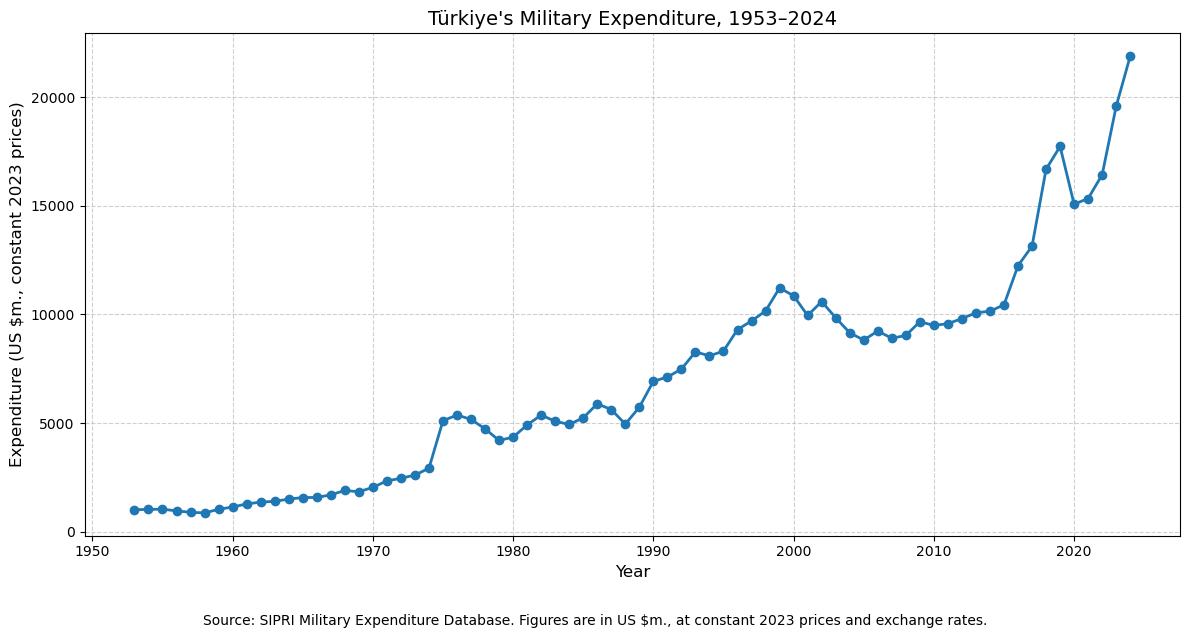

In [2]:
import matplotlib.pyplot as plt

# Plot Türkiye's military expenditure (constant 2023 USD, millions)
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Turkey_Milex_Constant2023_USD_millions"], marker="o", linewidth=2)

# Labels & title
plt.title("Türkiye's Military Expenditure, 1953–2024", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Expenditure (US $m., constant 2023 prices)", fontsize=12)

# Grid & caption
plt.grid(True, linestyle="--", alpha=0.6)
plt.figtext(
    0.5, -0.05,
    "Source: SIPRI Military Expenditure Database. Figures are in US $m., at constant 2023 prices and exchange rates.",
    wrap=True, ha="center", fontsize=10
)

# Show
plt.tight_layout()
plt.show()


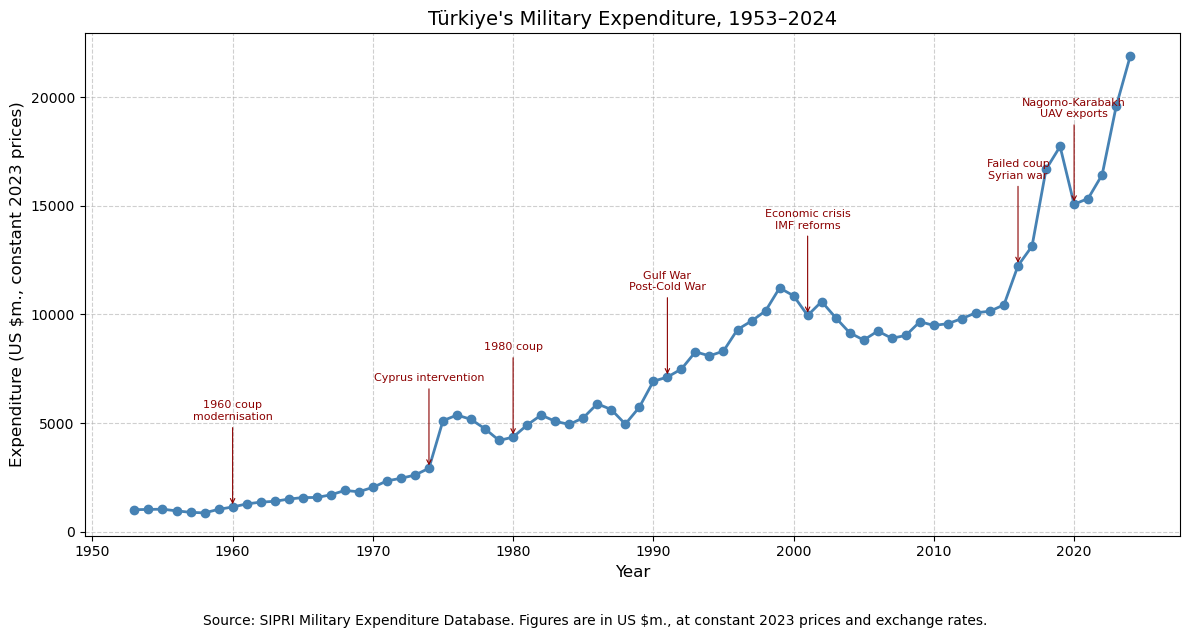

In [16]:
import matplotlib.pyplot as plt

# Plot Türkiye's military expenditure (constant 2023 USD, millions)
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Turkey_Milex_Constant2023_USD_millions"], marker="o", linewidth=2, color="steelblue")

# Labels & title
plt.title("Türkiye's Military Expenditure, 1953–2024", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Expenditure (US $m., constant 2023 prices)", fontsize=12)

# Add historical event annotations
events = {
    1952: "NATO accession",
    1960: "1960 coup\nmodernisation",
    1974: "Cyprus intervention",
    1980: "1980 coup",
    1991: "Gulf War\nPost-Cold War",
    2001: "Economic crisis\nIMF reforms",
    2016: "Failed coup\nSyrian war",
    2020: "Nagorno-Karabakh\nUAV exports"
}

for year, label in events.items():
    y_val = df.loc[df["Year"] == year, "Turkey_Milex_Constant2023_USD_millions"].values
    if len(y_val) > 0:
        plt.annotate(label,
                     xy=(year, y_val[0]),
                     xytext=(year, y_val[0] + 4000),  # vertical offset
                     arrowprops=dict(arrowstyle="->", lw=0.8, color="darkred"),
                     ha="center", fontsize=8, color="darkred")

# Grid & caption
plt.grid(True, linestyle="--", alpha=0.6)
plt.figtext(
    0.5, -0.05,
    "Source: SIPRI Military Expenditure Database. Figures are in US $m., at constant 2023 prices and exchange rates.",
    wrap=True, ha="center", fontsize=10
)

# Show
plt.tight_layout()
plt.show()


In [3]:
def cagr(start_val: float, end_val: float, n_years: int) -> float:
    """Compound annual growth rate."""
    return (end_val / start_val) ** (1 / n_years) - 1

# Define decade windows you want (inclusive start, inclusive end).
# You can edit these as needed; the last one is a partial decade.
periods = [
    (1953, 1960),
    (1960, 1970),
    (1970, 1980),
    (1980, 1990),
    (1990, 2000),
    (2000, 2010),
    (2010, 2020),
    (2020, 2024),
]

rows = []
for start, end in periods:
    start_val = df.loc[df["Year"] == start, "Turkey_Milex_Constant2023_USD_millions"].iloc[0]
    end_val   = df.loc[df["Year"] == end,   "Turkey_Milex_Constant2023_USD_millions"].iloc[0]
    n_years   = end - start
    rate      = cagr(start_val, end_val, n_years)
    rows.append({
        "Period": f"{start}-{end}",
        "Start (US$m, 2023 const.)": start_val,
        "End (US$m, 2023 const.)": end_val,
        "Years": n_years,
        "CAGR (%)": round(rate * 100, 2),
    })

growth_by_decade = pd.DataFrame(rows)

# Nice display
print(growth_by_decade.to_string(index=False))

   Period  Start (US$m, 2023 const.)  End (US$m, 2023 const.)  Years  CAGR (%)
1953-1960                     1014.2                   1137.3      7      1.65
1960-1970                     1137.3                   2041.1     10      6.02
1970-1980                     2041.1                   4353.4     10      7.87
1980-1990                     4353.4                   6923.8     10      4.75
1990-2000                     6923.8                  10857.7     10      4.60
2000-2010                    10857.7                   9493.1     10     -1.33
2010-2020                     9493.1                  15070.4     10      4.73
2020-2024                    15070.4                  21884.4      4      9.77


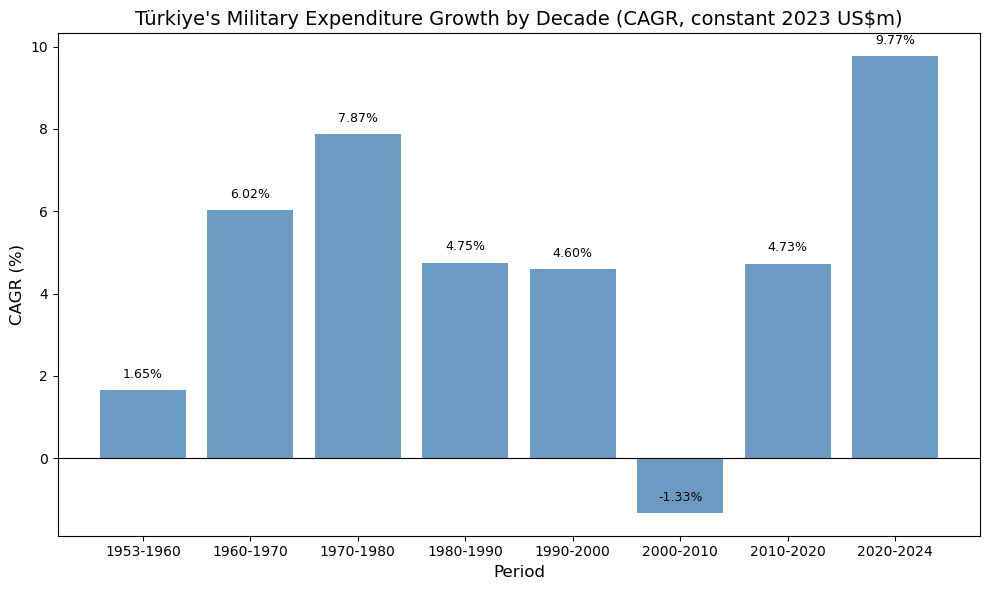

In [4]:
import matplotlib.pyplot as plt

# Plot CAGR by decade
plt.figure(figsize=(10,6))
plt.bar(growth_by_decade["Period"], growth_by_decade["CAGR (%)"], color="steelblue", alpha=0.8)

# Add labels on top of bars
for i, val in enumerate(growth_by_decade["CAGR (%)"]):
    plt.text(i, val + 0.3, f"{val:.2f}%", ha="center", fontsize=9)

plt.title("Türkiye's Military Expenditure Growth by Decade (CAGR, constant 2023 US$m)", fontsize=14)
plt.xlabel("Period", fontsize=12)
plt.ylabel("CAGR (%)", fontsize=12)
plt.axhline(0, color="black", linewidth=0.8)

plt.tight_layout()

plt.show()


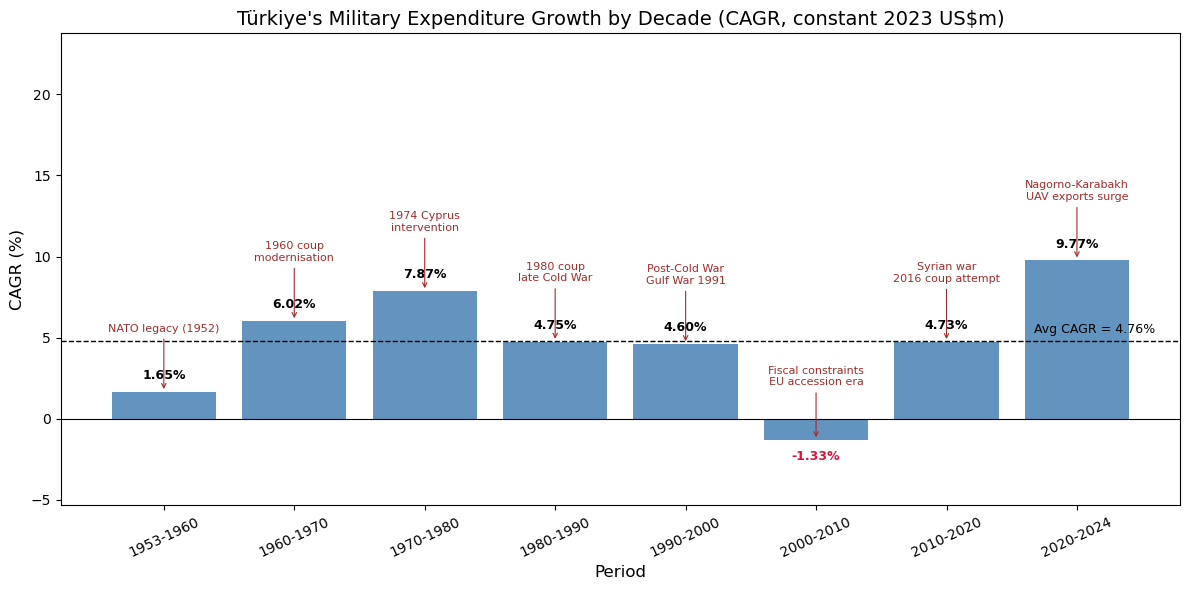

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
bars = ax.bar(growth_by_decade["Period"], growth_by_decade["CAGR (%)"], alpha=0.85, color="steelblue")

# Adjust ylim to leave space for annotations & negatives
min_val = growth_by_decade["CAGR (%)"].min()
max_val = growth_by_decade["CAGR (%)"].max()
ax.set_ylim(min_val - 4, max_val + 14)

# Add % labels on bars (positive above, negative below)
for bar in bars:
    h = bar.get_height()
    if h >= 0:
        ax.text(bar.get_x() + bar.get_width()/2, h + 0.6,
                f"{h:.2f}%", ha="center", va="bottom", fontsize=9, fontweight="bold")
    else:
        ax.text(bar.get_x() + bar.get_width()/2, h - 0.6,
                f"{h:.2f}%", ha="center", va="top", fontsize=9, fontweight="bold", color="crimson")

# Add historical event labels (aligned above bars)
events = {
    "1953-1960": "NATO legacy (1952)",
    "1960-1970": "1960 coup\nmodernisation",
    "1970-1980": "1974 Cyprus\nintervention",
    "1980-1990": "1980 coup\nlate Cold War",
    "1990-2000": "Post-Cold War\nGulf War 1991",
    "2000-2010": "Fiscal constraints\nEU accession era",
    "2010-2020": "Syrian war\n2016 coup attempt",
    "2020-2024": "Nagorno-Karabakh\nUAV exports surge"
}

for bar, period in zip(bars, growth_by_decade["Period"]):
    if period in events:
        h = bar.get_height()
        y_offset = 2 if h >= 0 else -2  # push label up or down depending on sign
        ax.annotate(events[period],
                    xy=(bar.get_x() + bar.get_width()/2, h),
                    xytext=(0, 40 + y_offset),  # vertical offset
                    textcoords="offset points",
                    ha="center", va="bottom",
                    fontsize=8, color="brown",
                    arrowprops=dict(arrowstyle="->", lw=0.8, color="brown"))

# Add average line
avg_cagr = growth_by_decade["CAGR (%)"].mean()
ax.axhline(avg_cagr, linestyle="--", linewidth=1, color="black")
ax.text(len(bars)-0.4, avg_cagr + 0.5, f"Avg CAGR = {avg_cagr:.2f}%", ha="right", fontsize=9)

# Titles and labels
ax.set_title("Türkiye's Military Expenditure Growth by Decade (CAGR, constant 2023 US$m)", fontsize=14)
ax.set_xlabel("Period", fontsize=12)
ax.set_ylabel("CAGR (%)", fontsize=12)
ax.axhline(0, color="black", linewidth=0.8)

plt.xticks(rotation=25)
plt.tight_layout()
plt.show()


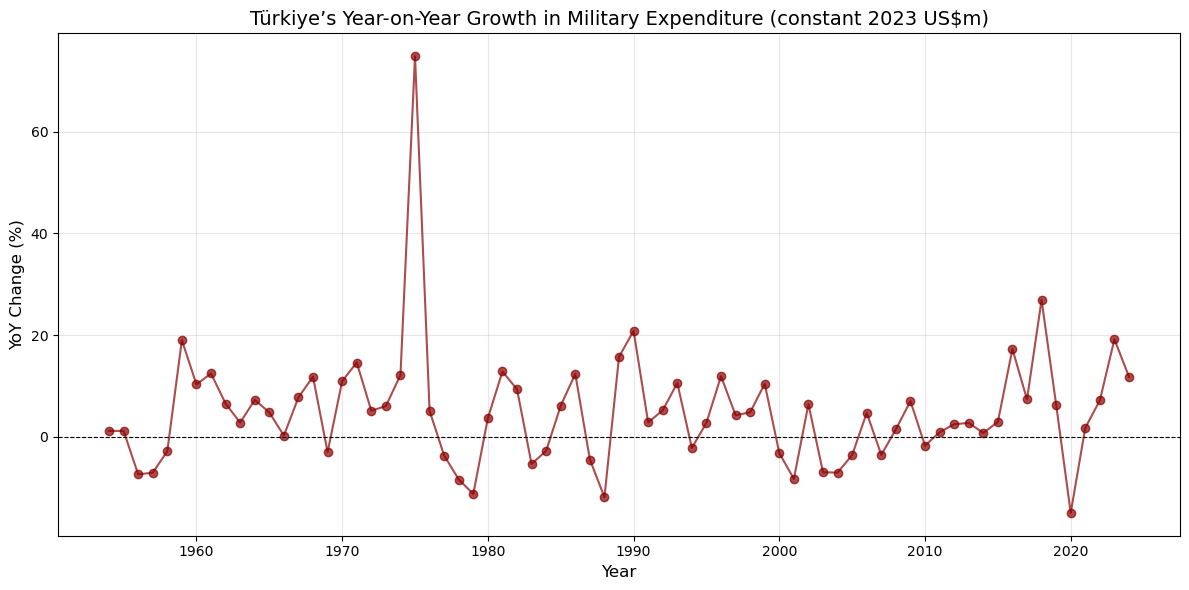

In [5]:
# Calculate Year-on-Year % Change
df["YoY_Change_%"] = df["Turkey_Milex_Constant2023_USD_millions"].pct_change() * 100

# Plot the YoY growth rate
plt.figure(figsize=(12,6))
plt.plot(df["Year"], df["YoY_Change_%"], marker="o", linestyle="-", color="darkred", alpha=0.7)

# Add horizontal line at 0
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")

plt.title("Türkiye’s Year-on-Year Growth in Military Expenditure (constant 2023 US$m)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("YoY Change (%)", fontsize=12)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


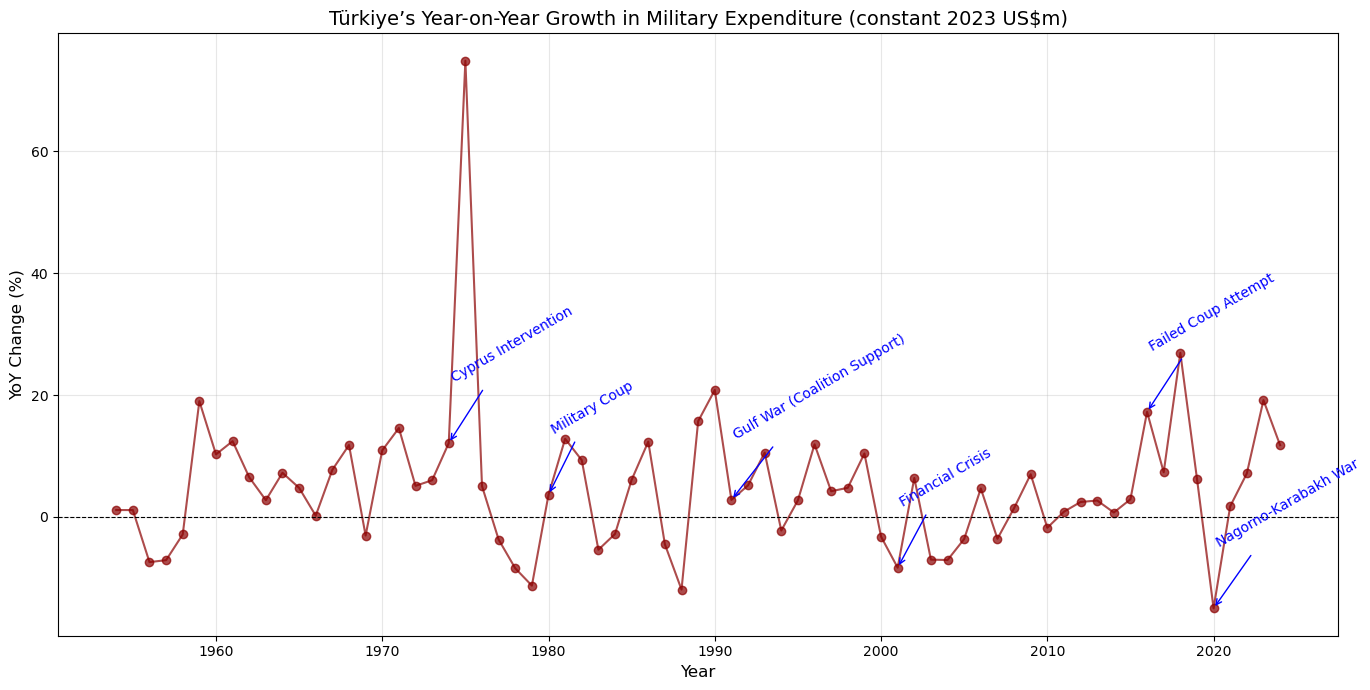

In [6]:
# Calculate YoY Change
df["YoY_Change_%"] = df["Turkey_Milex_Constant2023_USD_millions"].pct_change() * 100

# Key historical events to annotate
events = {
    1974: "Cyprus Intervention",
    1980: "Military Coup",
    1991: "Gulf War (Coalition Support)",
    2001: "Financial Crisis",
    2016: "Failed Coup Attempt",
    2020: "Nagorno-Karabakh War"
}

# Plot
plt.figure(figsize=(14,7))
plt.plot(df["Year"], df["YoY_Change_%"], marker="o", linestyle="-", color="darkred", alpha=0.7)

# Zero line
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")

# Annotate events
for year, label in events.items():
    if year in df["Year"].values:
        y_val = df.loc[df["Year"] == year, "YoY_Change_%"].values[0]
        plt.annotate(label, 
                     xy=(year, y_val), 
                     xytext=(year, y_val+10),  # adjust text position
                     arrowprops=dict(arrowstyle="->", color="blue", lw=1),
                     fontsize=10, color="blue", rotation=30)

# Titles and labels
plt.title("Türkiye’s Year-on-Year Growth in Military Expenditure (constant 2023 US$m)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("YoY Change (%)", fontsize=12)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

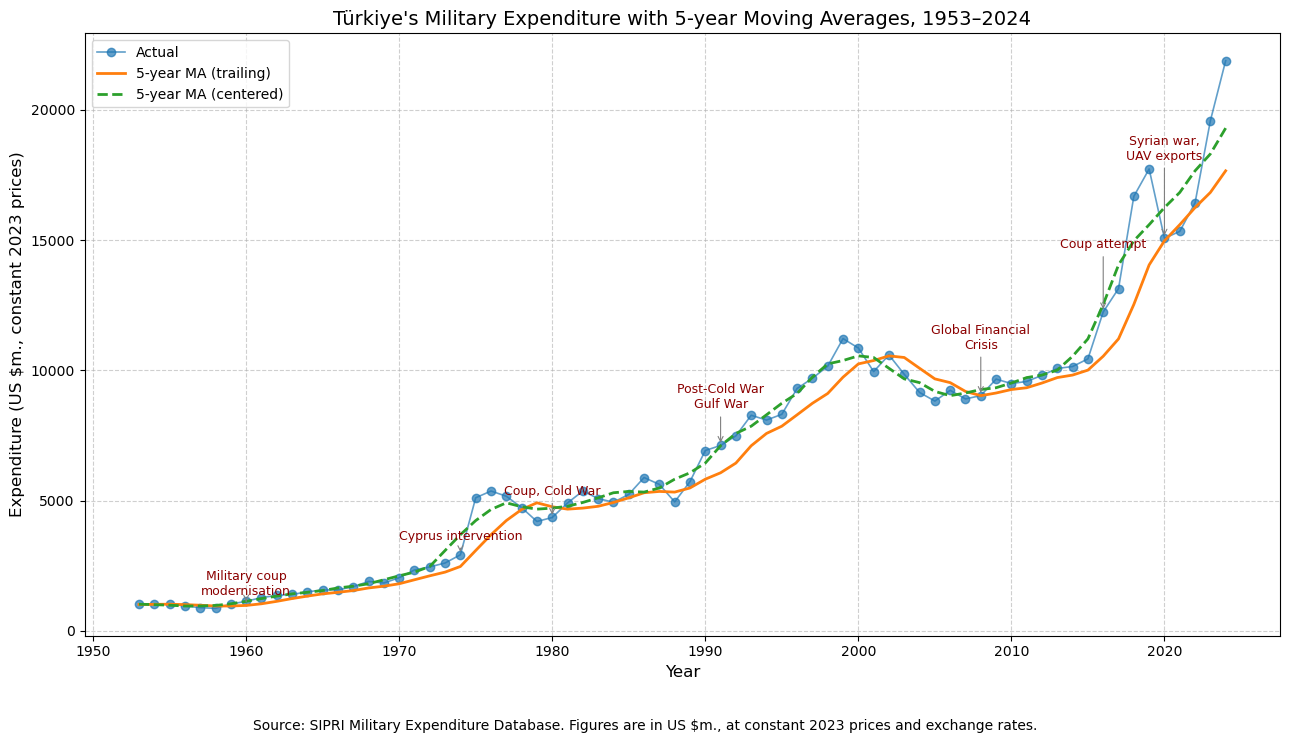

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Data ---
data = {
    "Year": list(range(1953, 2025)),
    "Turkey_Milex_Constant2023_USD_millions": [
        1014.2, 1025.7, 1037.3, 960.4, 892.3, 866.7, 1031.4, 1137.3, 1278.7, 1361.9,
        1399.4, 1500.8, 1572.4, 1575.7, 1697.7, 1898.0, 1840.1, 2041.1, 2338.9, 2458.3,
        2606.4, 2922.2, 5110.3, 5369.1, 5169.7, 4733.9, 4200.3, 4353.4, 4911.7, 5369.5,
        5080.5, 4938.8, 5239.6, 5887.1, 5622.4, 4952.2, 5730.0, 6923.8, 7117.5, 7486.5,
        8277.2, 8092.6, 8313.6, 9304.4, 9697.1, 10161.0, 11219.2, 10857.7, 9953.5, 10590.5,
        9848.8, 9152.5, 8821.3, 9234.0, 8903.6, 9031.8, 9664.1, 9493.1, 9574.5, 9809.5,
        10074.2, 10147.7, 10442.0, 12242.6, 13140.2, 16678.6, 17729.8, 15070.4, 15333.9, 
        16429.0, 19577.8, 21884.4
    ]
}
df = pd.DataFrame(data)

# --- Rolling averages ---
df["MA_5_trailing"] = df["Turkey_Milex_Constant2023_USD_millions"].rolling(window=5, min_periods=1).mean()
df["MA_5_centered"] = df["Turkey_Milex_Constant2023_USD_millions"].rolling(window=5, center=True, min_periods=1).mean()

# --- Plot ---
plt.figure(figsize=(13, 7))
plt.plot(df["Year"], df["Turkey_Milex_Constant2023_USD_millions"], marker="o", linewidth=1.2, label="Actual", alpha=0.7)
plt.plot(df["Year"], df["MA_5_trailing"], linewidth=2, label="5-year MA (trailing)")
plt.plot(df["Year"], df["MA_5_centered"], linewidth=2, linestyle="--", label="5-year MA (centered)")

# Event Annotations (now includes Financial Crisis)
events = {
    1952: "NATO accession",
    1960: "Military coup\nmodernisation",
    1974: "Cyprus intervention",
    1980: "Coup, Cold War",
    1991: "Post-Cold War\nGulf War",
    2008: "Global Financial\nCrisis",
    2016: "Coup attempt",
    2020: "Syrian war,\nUAV exports"
}

for year, label in events.items():
    y_val = df.loc[df["Year"] == year, "Turkey_Milex_Constant2023_USD_millions"].values
    if len(y_val) > 0:
        plt.annotate(
            label,
            xy=(year, y_val[0]),
            xytext=(year, y_val[0] * 1.2),  # move text above point
            ha="center", fontsize=9, color="darkred",
            arrowprops=dict(arrowstyle="->", color="gray", lw=0.8)
        )

# Titles and labels
plt.title("Türkiye's Military Expenditure with 5-year Moving Averages, 1953–2024", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Expenditure (US $m., constant 2023 prices)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

# Source caption
plt.figtext(
    0.5, -0.05,
    "Source: SIPRI Military Expenditure Database. Figures are in US $m., at constant 2023 prices and exchange rates.",
    wrap=True, ha="center", fontsize=10
)

plt.tight_layout()
plt.show()


Volatility of Türkiye's Military Expenditure by Decade
(YoY % and YoY absolute change computed on constant 2023 US$m)
Decade  std_yoy_pct  mean_yoy_pct  std_yoy_abs  n_obs
 1950s         9.74          0.65         88.0      6
 1960s         5.01          6.07         73.0     10
 1970s        24.21         10.53        751.0     10
 1980s         9.28          3.54        477.0     10
 1990s         6.47          7.12        443.0     10
 2000s         5.78         -1.33        573.0     10
 2010s         8.89          6.57       1126.0     10
 2020s        12.86          4.97       2243.0      5


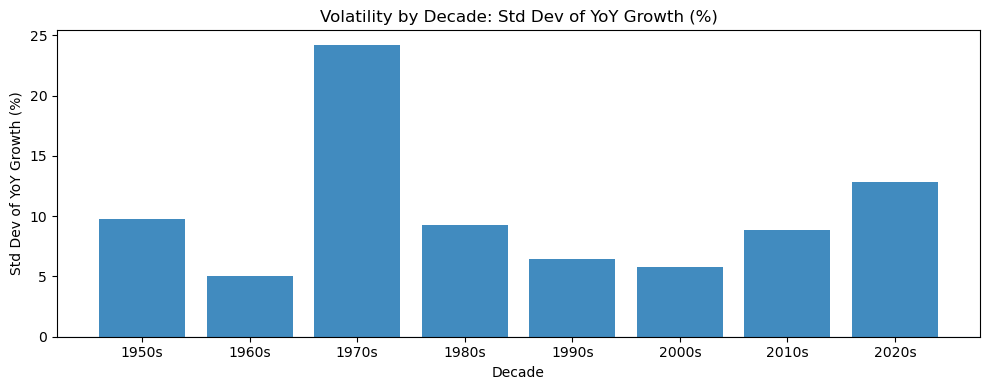

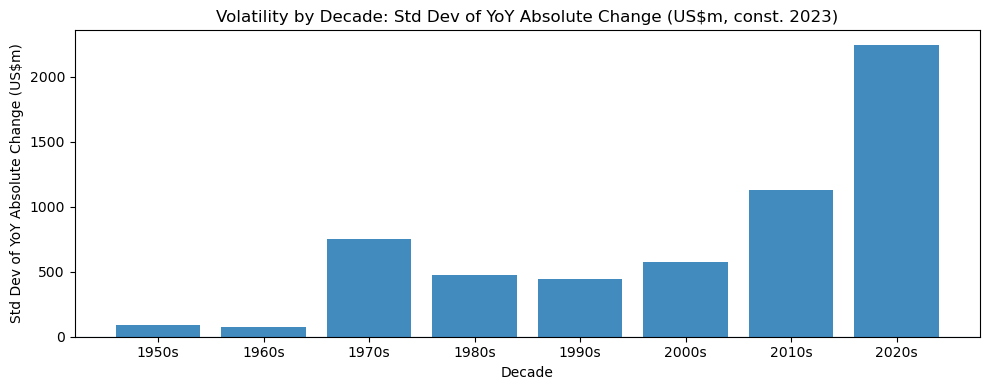

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Ensure sorted by year
df = df.sort_values("Year").reset_index(drop=True)

# Year-on-year changes
df["YoY_pct"] = df["Turkey_Milex_Constant2023_USD_millions"].pct_change() * 100.0
df["YoY_abs"] = df["Turkey_Milex_Constant2023_USD_millions"].diff()

# Decade labels (e.g., 1950s, 1960s, ...)
df["Decade"] = (df["Year"] // 10) * 10
df["Decade"] = df["Decade"].astype(int).astype(str) + "s"

# Aggregate volatility by decade
volatility = (
    df.groupby("Decade")
      .agg(
          std_yoy_pct = ("YoY_pct", "std"),      # volatility of growth rates
          mean_yoy_pct = ("YoY_pct", "mean"),    # average growth within decade
          std_yoy_abs = ("YoY_abs", "std"),      # volatility in level (US$m)
          n_obs = ("YoY_pct", lambda x: x.notna().sum())
      )
      .reset_index()
      .sort_values("Decade")
)

# Tidy rounding for presentation
volatility["std_yoy_pct"] = volatility["std_yoy_pct"].round(2)
volatility["mean_yoy_pct"] = volatility["mean_yoy_pct"].round(2)
volatility["std_yoy_abs"] = volatility["std_yoy_abs"].round(0)

print("Volatility of Türkiye's Military Expenditure by Decade")
print("(YoY % and YoY absolute change computed on constant 2023 US$m)")
print(volatility.to_string(index=False))

# --- Optional: visualise volatility by decade (two bar charts) ---

# 1) Volatility of growth rates (%)
plt.figure(figsize=(10,4))
plt.bar(volatility["Decade"], volatility["std_yoy_pct"], alpha=0.85)
plt.title("Volatility by Decade: Std Dev of YoY Growth (%)")
plt.xlabel("Decade"); plt.ylabel("Std Dev of YoY Growth (%)")
plt.axhline(0, linewidth=0.8)
plt.tight_layout()
plt.show()

# 2) Volatility of levels (US$m)
plt.figure(figsize=(10,4))
plt.bar(volatility["Decade"], volatility["std_yoy_abs"], alpha=0.85)
plt.title("Volatility by Decade: Std Dev of YoY Absolute Change (US$m, const. 2023)")
plt.xlabel("Decade"); plt.ylabel("Std Dev of YoY Absolute Change (US$m)")
plt.axhline(0, linewidth=0.8)
plt.tight_layout()
plt.show()


# ---------------------------
# HOW TO USE IN YOUR WRITE-UP
# ---------------------------
# • std_yoy_pct = Std Dev of YoY % changes → captures *budgetary stability vs. crisis responsiveness*.
#   Higher values mean Türkiye’s spending growth was volatile in that decade, lower values mean stable.
#
# • std_yoy_abs = Std Dev of YoY absolute changes (in constant 2023 US$m) → shows the *scale* of swings.
#   Even if % changes are stable, absolute spending may still vary massively as the budget grows.
#
# • mean_yoy_pct = Average YoY growth within each decade → helps distinguish between steady build-up
#   (positive mean, low volatility) vs erratic surges/drops (high volatility).
#
# • Because the series is in *constant 2023 US$*, changes reflect real differences, not inflation.
#
# • Always mention n_obs (number of observations) when interpreting. 
#   Example: the 1950s and 2020s only have partial decades, so their volatility measures may be misleading.


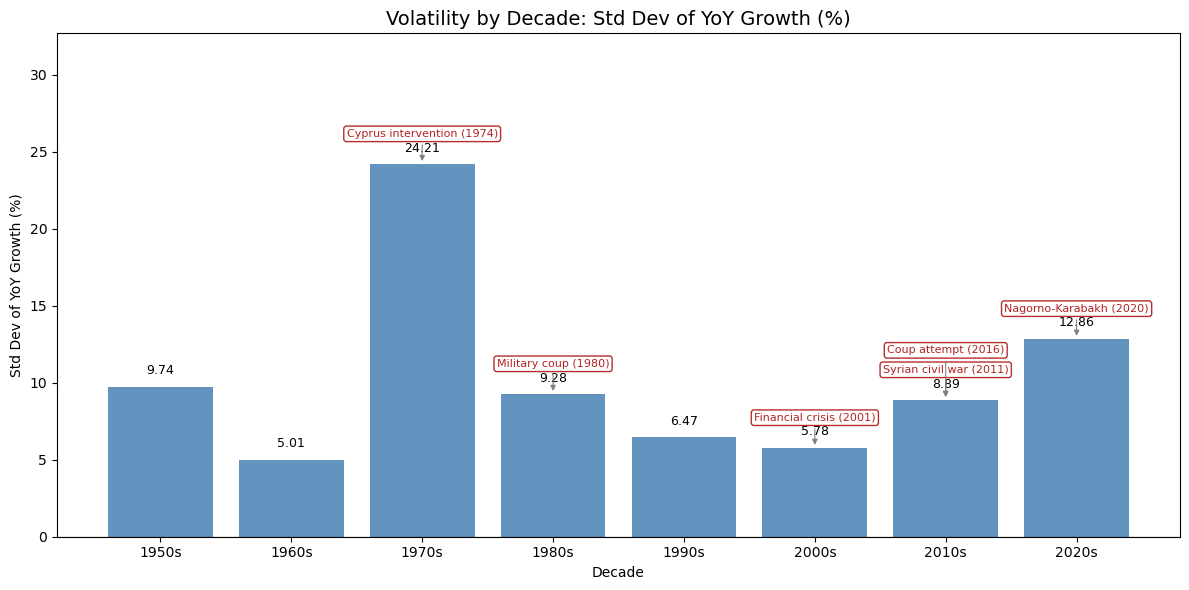

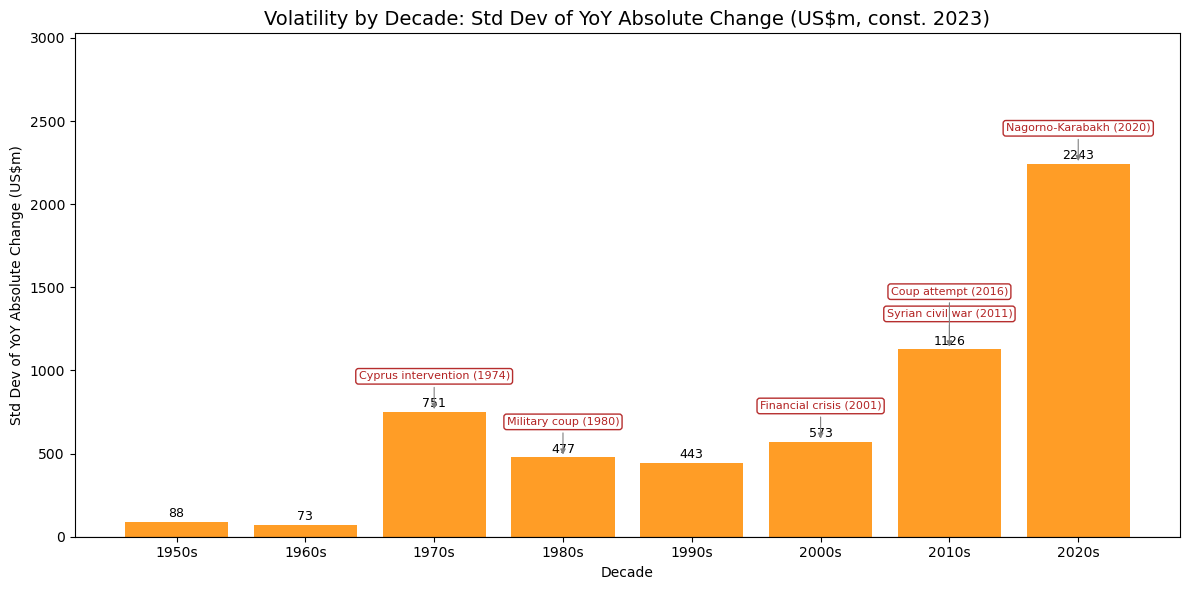

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def annotate_decade_events(ax, bars, events_by_decade, decade_labels,
                           base_offset=18, step_offset=14):
    """
    Attach neat, non-overlapping labels ABOVE each bar for events in that decade.
    Positions use 'offset points' so they don't blow up with axis scaling.
    """
    for i, dec in enumerate(decade_labels):
        if dec in events_by_decade:
            for j, label in enumerate(events_by_decade[dec]):
                ax.annotate(
                    label,
                    xy=(bars[i].get_x() + bars[i].get_width()/2, bars[i].get_height()),
                    xytext=(0, base_offset + j*step_offset),         # vertical stacking
                    textcoords="offset points",
                    ha="center", va="bottom",
                    fontsize=8, color="firebrick",
                    bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="firebrick", alpha=0.95),
                    arrowprops=dict(arrowstyle="-|>", lw=0.8, color="gray"),
                    clip_on=False, zorder=5
                )

# ---- Plot 1: Std Dev of YoY Growth (%) ----
fig, ax = plt.subplots(figsize=(12,6))

xpos = np.arange(len(volatility))
bars = ax.bar(xpos, volatility["std_yoy_pct"], alpha=0.85, color="steelblue")

ax.set_title("Volatility by Decade: Std Dev of YoY Growth (%)", fontsize=14)
ax.set_xlabel("Decade"); ax.set_ylabel("Std Dev of YoY Growth (%)")
ax.set_xticks(xpos); ax.set_xticklabels(volatility["Decade"])

# Add headroom so labels fit comfortably
ymax = float(volatility["std_yoy_pct"].max())
ax.set_ylim(0, ymax * 1.35)
ax.axhline(0, lw=0.8, color="black")

# Numeric value on each bar
for b in bars:
    h = b.get_height()
    ax.text(b.get_x()+b.get_width()/2, h+0.6, f"{h:.2f}",
            ha="center", va="bottom", fontsize=9)

# Events per decade (edit text as you like)
events_by_decade = {
    "1970s": ["Cyprus intervention (1974)"],
    "1980s": ["Military coup (1980)"],
    "2000s": ["Financial crisis (2001)"],
    "2010s": ["Syrian civil war (2011)", "Coup attempt (2016)"],
    "2020s": ["Nagorno-Karabakh (2020)"]
}

annotate_decade_events(ax, bars, events_by_decade, volatility["Decade"])
plt.tight_layout()
plt.show()

# ---- Plot 2: Std Dev of YoY Absolute Change (US$m, const. 2023) ----
fig, ax = plt.subplots(figsize=(12,6))

xpos = np.arange(len(volatility))
bars = ax.bar(xpos, volatility["std_yoy_abs"], alpha=0.85, color="darkorange")

ax.set_title("Volatility by Decade: Std Dev of YoY Absolute Change (US$m, const. 2023)", fontsize=14)
ax.set_xlabel("Decade"); ax.set_ylabel("Std Dev of YoY Absolute Change (US$m)")
ax.set_xticks(xpos); ax.set_xticklabels(volatility["Decade"])

ymax = float(volatility["std_yoy_abs"].max())
ax.set_ylim(0, ymax * 1.35)
ax.axhline(0, lw=0.8, color="black")

for b in bars:
    h = b.get_height()
    ax.text(b.get_x()+b.get_width()/2, h+10, f"{h:.0f}",
            ha="center", va="bottom", fontsize=9)

# Reuse same events; give a bit more spacing for the bigger scale
annotate_decade_events(ax, bars, events_by_decade, volatility["Decade"],
                       base_offset=22, step_offset=16)

plt.tight_layout()
plt.show()


C:\Users\gurde\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gurde\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gurde\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gurde\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\gurde\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

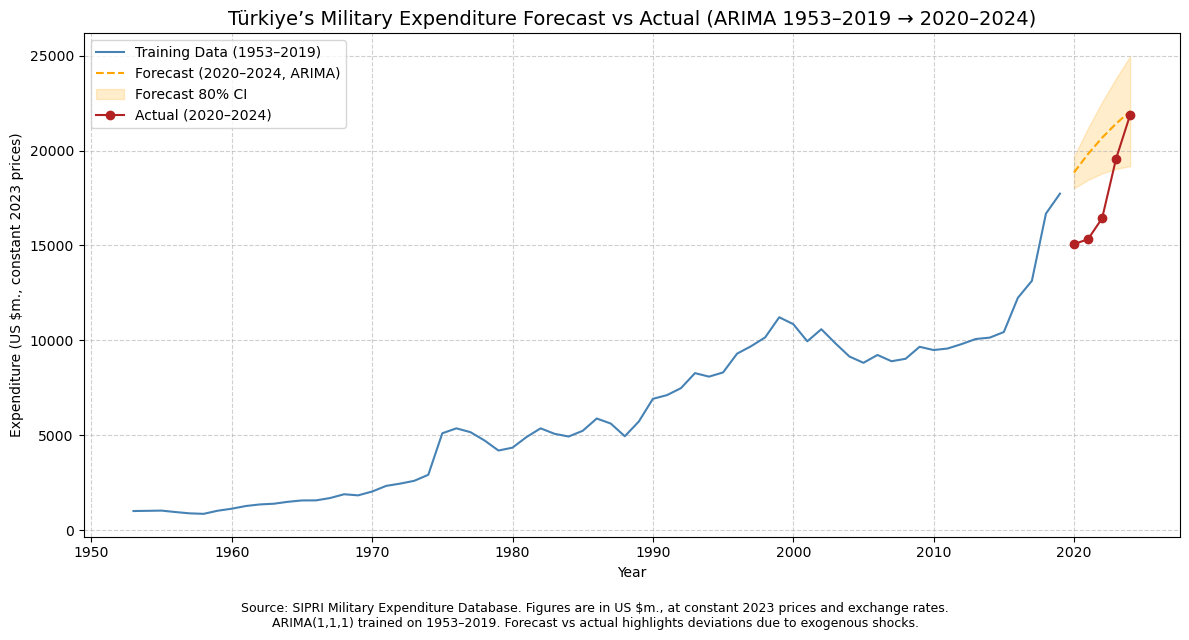


ARIMA Forecast vs Actual, 2020–2024 (constant 2023 US$m)
 Year  Actual     Forecast  Forecast_Lower80  Forecast_Upper80  Abs Deviation  % Deviation (Actual vs Forecast)  Above 80% CI?
 2020 15070.4 18844.567525      18008.757781      19680.377270        -3774.2                            -20.03          False
 2021 15333.9 19819.860912      18455.858909      21183.862915        -4486.0                            -22.63          False
 2022 16429.0 20673.130466      18795.910675      22550.350257        -4244.1                            -20.53          False
 2023 19577.8 21419.643200      19032.220640      23807.065760        -1841.8                             -8.60          False
 2024 21884.4 22072.755993      19177.893858      24967.618128         -188.4                             -0.85          False

Average % deviation (2020–2024): -14.53% | Share of years Actual > Upper 80% CI: 0.0%


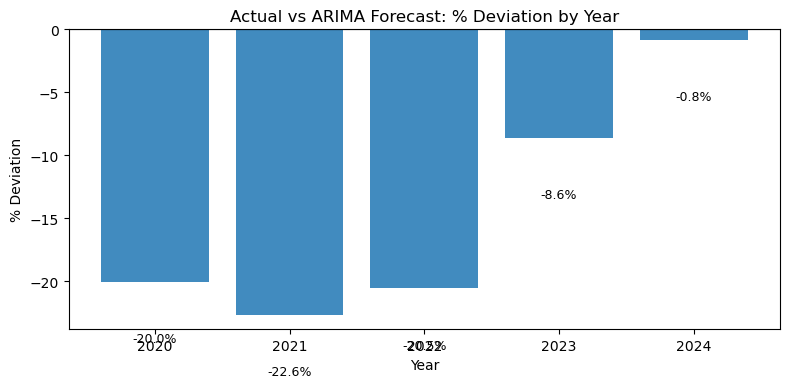

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# ----------------------------
# DATA (SIPRI, constant 2023 US$m)
# ----------------------------
data = {
    "Year": list(range(1953, 2025)),
    "Turkey_Milex_Constant2023_USD_millions": [
        1014.2, 1025.7, 1037.3, 960.4, 892.3, 866.7, 1031.4, 1137.3, 1278.7, 1361.9,
        1399.4, 1500.8, 1572.4, 1575.7, 1697.7, 1898.0, 1840.1, 2041.1, 2338.9, 2458.3,
        2606.4, 2922.2, 5110.3, 5369.1, 5169.7, 4733.9, 4200.3, 4353.4, 4911.7, 5369.5,
        5080.5, 4938.8, 5239.6, 5887.1, 5622.4, 4952.2, 5730.0, 6923.8, 7117.5, 7486.5,
        8277.2, 8092.6, 8313.6, 9304.4, 9697.1, 10161.0, 11219.2, 10857.7, 9953.5, 10590.5,
        9848.8, 9152.5, 8821.3, 9234.0, 8903.6, 9031.8, 9664.1, 9493.1, 9574.5, 9809.5,
        10074.2, 10147.7, 10442.0, 12242.6, 13140.2, 16678.6, 17729.8, 15070.4, 15333.9, 
        16429.0, 19577.8, 21884.4
    ]
}
df = pd.DataFrame(data)

# ----------------------------
# TRAIN/TEST SPLIT
# ----------------------------
train = df[df["Year"] <= 2019].set_index("Year")["Turkey_Milex_Constant2023_USD_millions"]
test  = df[df["Year"] >= 2020].set_index("Year")["Turkey_Milex_Constant2023_USD_millions"]

# ----------------------------
# FIT ARIMA AND FORECAST
# ----------------------------
model = ARIMA(train, order=(1,1,1))
fitted = model.fit()

forecast = fitted.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci   = forecast.conf_int(alpha=0.2)  # 80% CI for readability

# ----------------------------
# PLOT: FORECAST VS ACTUAL
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Training Data (1953–2019)", color="steelblue")
plt.plot(test.index, forecast_mean, label="Forecast (2020–2024, ARIMA)", color="orange", linestyle="--")
plt.fill_between(test.index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1],
                 color="orange", alpha=0.2, label="Forecast 80% CI")
plt.plot(test.index, test, marker="o", label="Actual (2020–2024)", color="firebrick")

plt.title("Türkiye’s Military Expenditure Forecast vs Actual (ARIMA 1953–2019 → 2020–2024)", fontsize=14)
plt.xlabel("Year"); plt.ylabel("Expenditure (US $m., constant 2023 prices)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.figtext(
    0.5, -0.05,
    "Source: SIPRI Military Expenditure Database. Figures are in US $m., at constant 2023 prices and exchange rates.\n"
    "ARIMA(1,1,1) trained on 1953–2019. Forecast vs actual highlights deviations due to exogenous shocks.",
    wrap=True, ha="center", fontsize=9
)
plt.tight_layout()
plt.show()

# ----------------------------
# NUMERICAL COMPARISON (KEY TABLE)
# ----------------------------
comparison = pd.DataFrame({
    "Year": test.index.values,
    "Actual": test.values,
    "Forecast": forecast_mean.values,
    "Forecast_Lower80": forecast_ci.iloc[:, 0].values,
    "Forecast_Upper80": forecast_ci.iloc[:, 1].values
})
comparison["Abs Deviation"] = (comparison["Actual"] - comparison["Forecast"]).round(1)
comparison["% Deviation (Actual vs Forecast)"] = (
    (comparison["Actual"] - comparison["Forecast"]) / comparison["Forecast"] * 100
).round(2)
comparison["Above 80% CI?"] = comparison["Actual"] > comparison["Forecast_Upper80"]

print("\nARIMA Forecast vs Actual, 2020–2024 (constant 2023 US$m)")
print(comparison.to_string(index=False))

# Overall summary metrics (helpful one-liners for the dissertation)
avg_pct_dev = comparison["% Deviation (Actual vs Forecast)"].mean().round(2)
share_above_ci = (comparison["Above 80% CI?"].mean() * 100).round(1)

print(f"\nAverage % deviation (2020–2024): {avg_pct_dev}% "
      f"| Share of years Actual > Upper 80% CI: {share_above_ci}%")

# ----------------------------
# OPTIONAL: BAR CHART OF % DEVIATIONS
# ----------------------------
plt.figure(figsize=(8,4))
plt.bar(comparison["Year"].astype(str), comparison["% Deviation (Actual vs Forecast)"], alpha=0.85)
for i, v in enumerate(comparison["% Deviation (Actual vs Forecast)"]):
    plt.text(i, v + (2 if v >= 0 else -4), f"{v:.1f}%", ha="center", va="bottom" if v >= 0 else "top", fontsize=9)
plt.axhline(0, color="black", linewidth=0.8)
plt.title("Actual vs ARIMA Forecast: % Deviation by Year")
plt.xlabel("Year"); plt.ylabel("% Deviation")
plt.tight_layout()
plt.show()


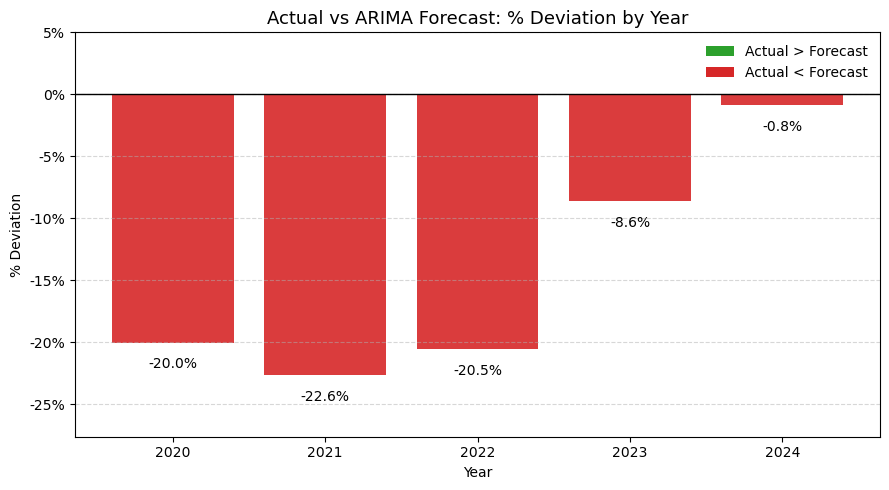

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Patch
import numpy as np

# Pull the series we need
years = comparison["Year"].astype(str).values
vals  = comparison["% Deviation (Actual vs Forecast)"].values

# Colors: red if Actual < Forecast, green if Actual > Forecast
colors = ["#d62728" if v < 0 else "#2ca02c" for v in vals]

fig, ax = plt.subplots(figsize=(9, 5))

bars = ax.bar(years, vals, color=colors, alpha=0.9)

# Format y-axis as percent (values already in percent units)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.0f}%"))

# Reference line at 0
ax.axhline(0, color="black", linewidth=1)

# Nice y-limits with headroom
ymin = min(vals.min(), 0) - 5
ymax = max(vals.max(), 0) + 5
ax.set_ylim(ymin, ymax)

# Labels on bars with smart placement
for b, v in zip(bars, vals):
    x = b.get_x() + b.get_width()/2
    # place labels just above/below the bar end
    if v >= 0:
        ax.text(x, v + 1.2, f"{v:.1f}%", ha="center", va="bottom", fontsize=10)
    else:
        ax.text(x, v - 1.2, f"{v:.1f}%", ha="center", va="top", fontsize=10)

# Styling
ax.set_title("Actual vs ARIMA Forecast: % Deviation by Year", fontsize=13)
ax.set_xlabel("Year")
ax.set_ylabel("% Deviation")
ax.grid(axis="y", linestyle="--", alpha=0.5)

# Legend
legend_elems = [Patch(facecolor="#2ca02c", label="Actual > Forecast"),
                Patch(facecolor="#d62728", label="Actual < Forecast")]
ax.legend(handles=legend_elems, loc="best", frameon=False)

plt.tight_layout()
plt.show()


,Year,F,p
17,1975,91.005746,1.110223e-16
16,1974,80.229841,1.110223e-16
15,1973,67.681724,1.110223e-16
18,1976,67.602322,1.110223e-16
14,1972,57.863181,2.109424e-15
19,1977,57.214730,2.664535e-15
45,2003,56.425642,3.552714e-15
46,2004,54.226145,8.326673e-15
43,2001,54.193002,8.437695e-15
24,1982,53.961844,9.214851e-15


Selected break years (data-driven Chow sweep): [1975.0, 2003.0, 1982.0]


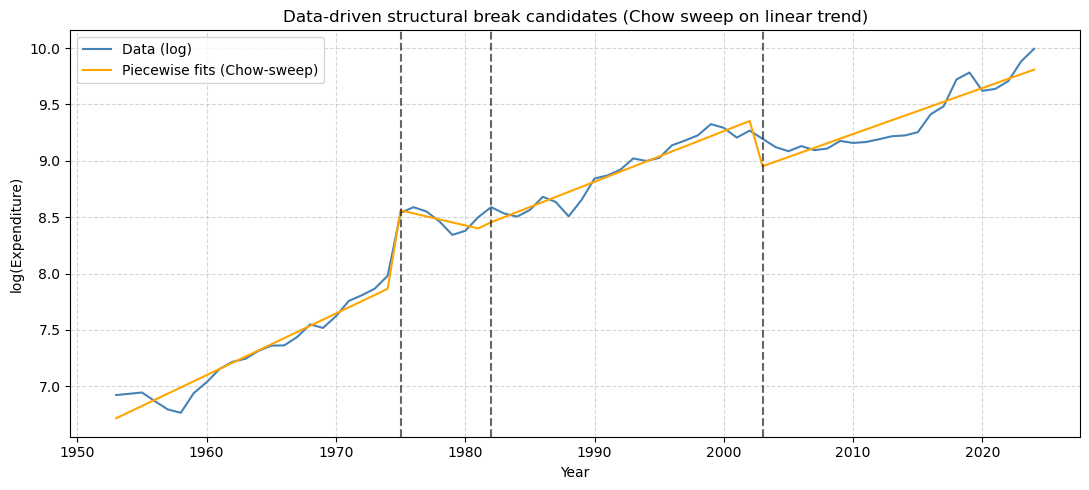

In [29]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import f as f_dist
import matplotlib.pyplot as plt

data = {
    "Year": list(range(1953, 2025)),
    "Turkey_Milex_Constant2023_USD_millions": [
        1014.2, 1025.7, 1037.3, 960.4, 892.3, 866.7, 1031.4, 1137.3, 1278.7, 1361.9,
        1399.4, 1500.8, 1572.4, 1575.7, 1697.7, 1898.0, 1840.1, 2041.1, 2338.9, 2458.3,
        2606.4, 2922.2, 5110.3, 5369.1, 5169.7, 4733.9, 4200.3, 4353.4, 4911.7, 5369.5,
        5080.5, 4938.8, 5239.6, 5887.1, 5622.4, 4952.2, 5730.0, 6923.8, 7117.5, 7486.5,
        8277.2, 8092.6, 8313.6, 9304.4, 9697.1, 10161.0, 11219.2, 10857.7, 9953.5, 10590.5,
        9848.8, 9152.5, 8821.3, 9234.0, 8903.6, 9031.8, 9664.1, 9493.1, 9574.5, 9809.5,
        10074.2, 10147.7, 10442.0, 12242.6, 13140.2, 16678.6, 17729.8, 15070.4, 15333.9, 
        16429.0, 19577.8, 21884.4
    ]
}
df = pd.DataFrame(data)

# Use logs for smoother trend
y = np.log(df["Turkey_Milex_Constant2023_USD_millions"].values)
X = df["Year"].values
years = df["Year"].values
Xc = sm.add_constant(X)

def chow_at(idx):
    """Chow F and p when splitting at index idx (split starts at that index)."""
    # need at least a few obs on each side
    if idx < 5 or len(y) - idx < 5:
        return np.nan, np.nan
    m_full = sm.OLS(y, Xc).fit()
    sse_full = m_full.ssr
    m1 = sm.OLS(y[:idx], Xc[:idx]).fit(); sse1 = m1.ssr
    m2 = sm.OLS(y[idx:], Xc[idx:]).fit(); sse2 = m2.ssr
    k = Xc.shape[1]
    n1, n2 = idx, len(y) - idx
    F = ((sse_full - (sse1 + sse2)) / k) / ((sse1 + sse2) / (n1 + n2 - 2*k))
    p = 1 - f_dist.cdf(F, dfn=k, dfd=(n1 + n2 - 2*k))
    return F, p

# Sweep all plausible break years (skip edges)
results = []
for i in range(5, len(years)-5):
    F, p = chow_at(i)
    results.append((int(years[i]), F, p))

res_df = pd.DataFrame(results, columns=["Year","F","p"]).dropna().sort_values("F", ascending=False)
display(res_df.head(15))  # top candidates

# pick top K non-adjacent breaks
K = 3
picked = []
for _, row in res_df.iterrows():
    y0 = row["Year"]
    if all(abs(y0 - y1) > 3 for y1 in picked):  # keep breaks at least 3 yrs apart
        picked.append(y0)
    if len(picked) == K:
        break

print("Selected break years (data-driven Chow sweep):", picked)

# Visualize piecewise fits for the selected breaks
breaks_sorted = sorted(picked)
segments = [years.min()] + breaks_sorted + [years.max()+1]
yhat = np.zeros_like(y, dtype=float)

for s in range(len(segments)-1):
    start_year = segments[s]
    end_year   = segments[s+1]-1
    mask = (years >= start_year) & (years <= end_year)
    Xi = sm.add_constant(X[mask])
    yi = y[mask]
    fit = sm.OLS(yi, Xi).fit()
    yhat[mask] = fit.predict(Xi)

plt.figure(figsize=(11,5))
plt.plot(years, y, label="Data (log)", color="steelblue")
plt.plot(years, yhat, label="Piecewise fits (Chow-sweep)", color="orange")
for by in breaks_sorted:
    plt.axvline(by, color="black", linestyle="--", alpha=0.6)
plt.title("Data-driven structural break candidates (Chow sweep on linear trend)")
plt.xlabel("Year"); plt.ylabel("log(Expenditure)")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.5); plt.tight_layout()
plt.show()


Detected structural breaks at: [1960, 1969, 1974, 1990, 2016]


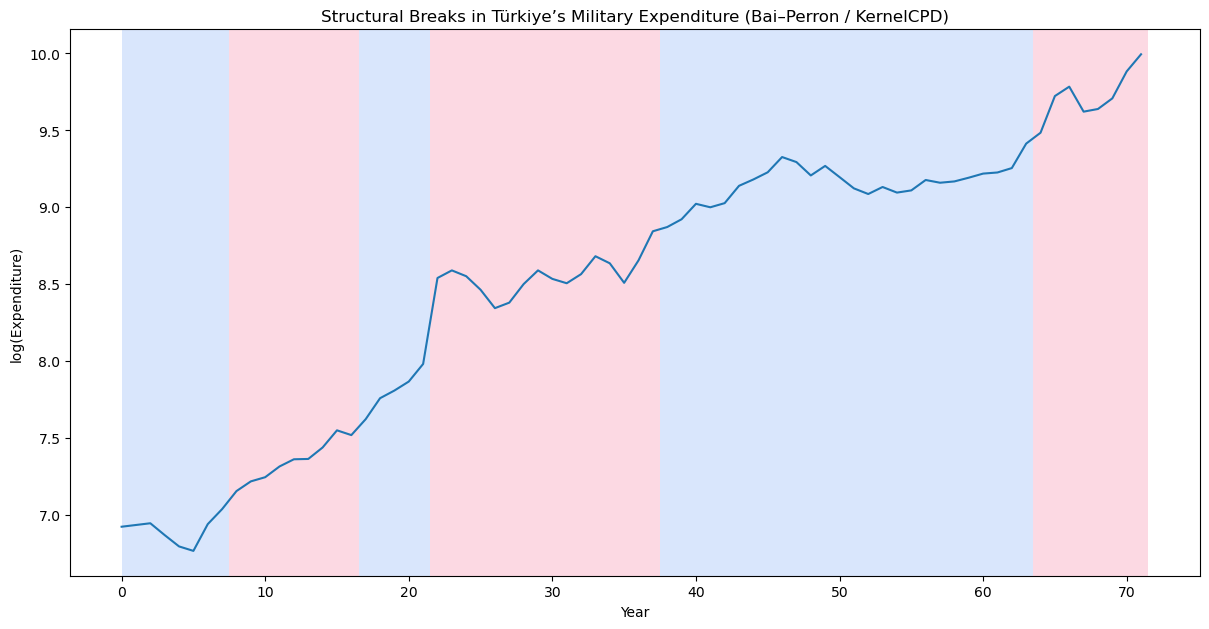

In [32]:
!pip install ruptures

data = {
    "Year": list(range(1953, 2025)),
    "Turkey_Milex_Constant2023_USD_millions": [
        1014.2, 1025.7, 1037.3, 960.4, 892.3, 866.7, 1031.4, 1137.3, 1278.7, 1361.9,
        1399.4, 1500.8, 1572.4, 1575.7, 1697.7, 1898.0, 1840.1, 2041.1, 2338.9, 2458.3,
        2606.4, 2922.2, 5110.3, 5369.1, 5169.7, 4733.9, 4200.3, 4353.4, 4911.7, 5369.5,
        5080.5, 4938.8, 5239.6, 5887.1, 5622.4, 4952.2, 5730.0, 6923.8, 7117.5, 7486.5,
        8277.2, 8092.6, 8313.6, 9304.4, 9697.1, 10161.0, 11219.2, 10857.7, 9953.5, 10590.5,
        9848.8, 9152.5, 8821.3, 9234.0, 8903.6, 9031.8, 9664.1, 9493.1, 9574.5, 9809.5,
        10074.2, 10147.7, 10442.0, 12242.6, 13140.2, 16678.6, 17729.8, 15070.4, 15333.9, 
        16429.0, 19577.8, 21884.4
    ]
}
df = pd.DataFrame(data)


import ruptures as rpt

# Use log of expenditure for smoother growth trend
signal = np.log(df["Turkey_Milex_Constant2023_USD_millions"].values)

# Fit multiple breakpoints (max 5)
model = rpt.KernelCPD(kernel="linear").fit(signal)
breaks = model.predict(n_bkps=5)  # 5 potential breaks

# Map back to years
break_years = [df["Year"].iloc[b-1] for b in breaks[:-1]]
print("Detected structural breaks at:", break_years)

# Plot
rpt.display(signal, breaks, figsize=(12,6))
plt.title("Structural Breaks in Türkiye’s Military Expenditure (Bai–Perron / KernelCPD)")
plt.xlabel("Year")
plt.ylabel("log(Expenditure)")
plt.show()


Detected break years: [1960, 1969, 1974, 1990, 2016]

=== Regime Growth Rates ===
   Start   End  Annual Growth Rate (%)
0   1953  1960                0.258678
1   1961  1969                4.929003
2   1970  1974                8.610565
3   1975  1990                1.440790
4   1991  2016                0.952494
5   2017  2024                5.078025


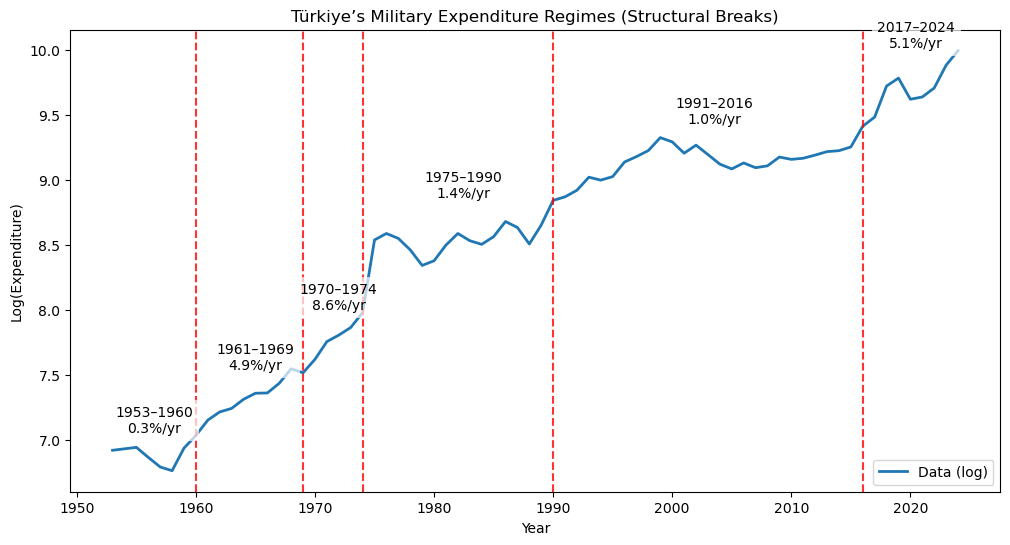

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
from sklearn.linear_model import LinearRegression

# === Load your data ===
data = {
    "Year": list(range(1953, 2025)),
    "Turkey_Milex_Constant2023_USD_millions": [
        1014.2, 1025.7, 1037.3, 960.4, 892.3, 866.7, 1031.4, 1137.3, 1278.7, 1361.9,
        1399.4, 1500.8, 1572.4, 1575.7, 1697.7, 1898.0, 1840.1, 2041.1, 2338.9, 2458.3,
        2606.4, 2922.2, 5110.3, 5369.1, 5169.7, 4733.9, 4200.3, 4353.4, 4911.7, 5369.5,
        5080.5, 4938.8, 5239.6, 5887.1, 5622.4, 4952.2, 5730.0, 6923.8, 7117.5, 7486.5,
        8277.2, 8092.6, 8313.6, 9304.4, 9697.1, 10161.0, 11219.2, 10857.7, 9953.5, 10590.5,
        9848.8, 9152.5, 8821.3, 9234.0, 8903.6, 9031.8, 9664.1, 9493.1, 9574.5, 9809.5,
        10074.2, 10147.7, 10442.0, 12242.6, 13140.2, 16678.6, 17729.8, 15070.4, 15333.9, 
        16429.0, 19577.8, 21884.4
    ]
}
df = pd.DataFrame(data)

# Log-transform
df["log_milex"] = np.log(df["Turkey_Milex_Constant2023_USD_millions"])

# === Structural Break Detection ===
signal = df["log_milex"].values.reshape(-1,1)
algo = rpt.KernelCPD(kernel="linear").fit(signal)
breaks = algo.predict(n_bkps=5)  

break_years = [df["Year"].iloc[b-1] for b in breaks[:-1]]
print("Detected break years:", break_years)

# === Estimate slopes for each regime ===
results = []
prev_idx = 0
for b in breaks:
    seg = df.iloc[prev_idx:b]
    X = seg["Year"].values.reshape(-1,1)
    y = seg["log_milex"].values
    reg = LinearRegression().fit(X, y)
    slope = reg.coef_[0]
    annual_growth = (np.exp(slope) - 1) * 100
    results.append({
        "Start": seg["Year"].iloc[0],
        "End": seg["Year"].iloc[-1],
        "Annual Growth Rate (%)": annual_growth
    })
    prev_idx = b

regime_df = pd.DataFrame(results)
print("\n=== Regime Growth Rates ===")
print(regime_df)

# === Plot with labels ===
plt.figure(figsize=(12,6))
plt.plot(df["Year"], df["log_milex"], label="Data (log)", linewidth=2)

# Vertical lines for breaks
for year in break_years:
    plt.axvline(year, color="red", linestyle="--", alpha=0.8)

# Annotate regimes with growth rates
for row in results:
    x_pos = (row["Start"] + row["End"]) / 2
    y_pos = df.loc[df["Year"]==row["End"], "log_milex"].values[0]  
    label = f"{row['Start']}–{row['End']}\n{row['Annual Growth Rate (%)']:.1f}%/yr"
    plt.text(x_pos, y_pos, label, ha="center", va="bottom", fontsize=10,
             bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))

plt.xlabel("Year")
plt.ylabel("Log(Expenditure)")
plt.title("Türkiye’s Military Expenditure Regimes (Structural Breaks)")
plt.legend()
plt.show()


Summary (share of GDP, %):
count   65.00
mean     3.18
std      0.84
min      1.66
25%      2.39
50%      3.35
75%      3.76
max      5.12

Peak burden: 5.12% in 1975


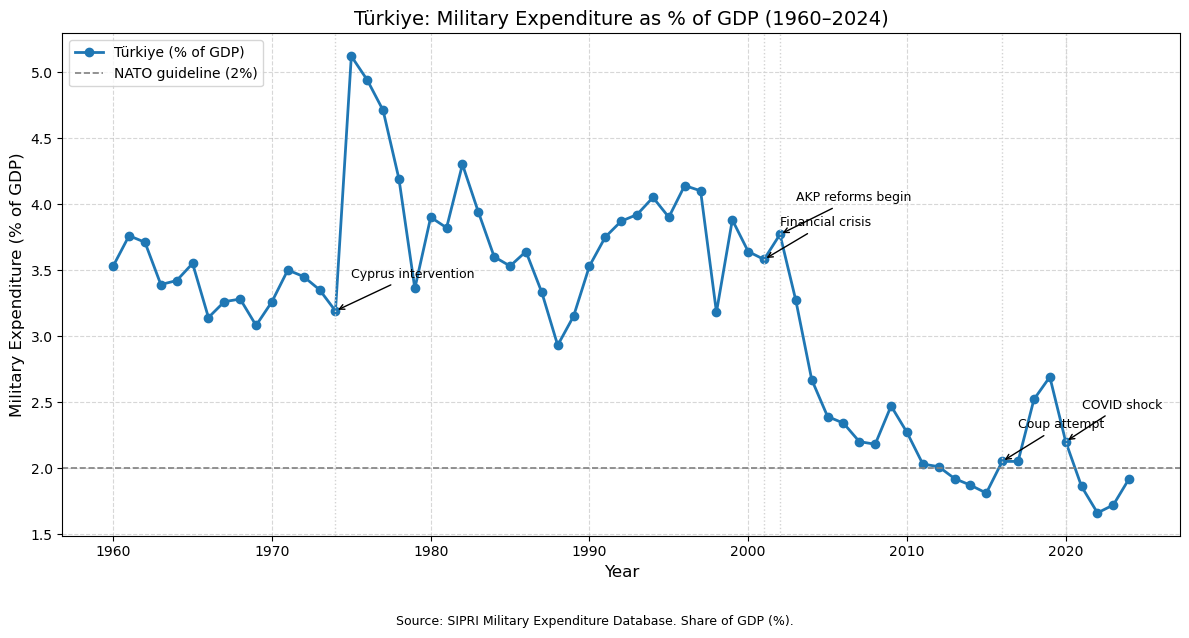


Average defence burden by decade (% of GDP):
Decade Turkey_Milex_Share_GDP_pct
 1960s                       3.41
 1970s                       3.91
 1980s                       3.61
 1990s                       3.83
 2000s                       2.85
 2010s                       2.12
 2020s                       1.87


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1) Data → DataFrame
# -----------------------------
years = list(range(1960, 2025))
pct_str = [
    "3.53%","3.76%","3.71%","3.39%","3.42%","3.55%","3.14%","3.26%","3.28%","3.08%",
    "3.26%","3.50%","3.45%","3.35%","3.19%","5.12%","4.94%","4.71%","4.19%","3.36%",
    "3.90%","3.82%","4.30%","3.94%","3.60%","3.53%","3.64%","3.33%","2.93%","3.15%",
    "3.53%","3.75%","3.87%","3.92%","4.05%","3.90%","4.14%","4.10%","3.18%","3.88%",
    "3.64%","3.58%","3.77%","3.27%","2.67%","2.39%","2.34%","2.20%","2.18%","2.47%",
    "2.27%","2.03%","2.01%","1.92%","1.87%","1.81%","2.05%","2.05%","2.52%","2.69%",
    "2.20%","1.86%","1.66%","1.72%","1.92%"
]

df_gdp = pd.DataFrame({
    "Year": years,
    "Turkey_Milex_Share_GDP_pct": [float(s.strip("%")) for s in pct_str]
})

# -----------------------------
# 2) Quick checks / helpers
# -----------------------------
# Basic stats you can cite
desc = df_gdp["Turkey_Milex_Share_GDP_pct"].describe()
peak_year = df_gdp.loc[df_gdp["Turkey_Milex_Share_GDP_pct"].idxmax(), "Year"]
peak_val  = df_gdp["Turkey_Milex_Share_GDP_pct"].max()

print("Summary (share of GDP, %):")
print(desc.to_string(float_format=lambda x: f"{x:.2f}"))
print(f"\nPeak burden: {peak_val:.2f}% in {peak_year}")

# -----------------------------
# 3) Plot: % of GDP over time
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df_gdp["Year"], df_gdp["Turkey_Milex_Share_GDP_pct"], linewidth=2, marker="o", label="Türkiye (% of GDP)")

# NATO 2% guideline
plt.axhline(2.0, color="gray", linestyle="--", linewidth=1.2, label="NATO guideline (2%)")

# Key event labels (adjust/extend as you like)
events = {
    1974: "Cyprus intervention",
    2001: "Financial crisis",
    2002: "AKP reforms begin",
    2016: "Coup attempt",
    2020: "COVID shock"
}
for yr, label in events.items():
    if df_gdp["Year"].between(df_gdp["Year"].min(), df_gdp["Year"].max()).any():
        if yr in df_gdp["Year"].values:
            yval = df_gdp.loc[df_gdp["Year"] == yr, "Turkey_Milex_Share_GDP_pct"].values[0]
            plt.axvline(yr, color="lightgray", linestyle=":", linewidth=1)
            plt.annotate(
                label, xy=(yr, yval), xytext=(yr+1, yval+0.25),
                arrowprops=dict(arrowstyle="->", lw=1, color="black"),
                fontsize=9
            )

plt.title("Türkiye: Military Expenditure as % of GDP (1960–2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Military Expenditure (% of GDP)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()

# Source note
plt.figtext(
    0.5, -0.05,
    "Source: SIPRI Military Expenditure Database. Share of GDP (%).",
    ha="center", fontsize=9
)

plt.show()

# -----------------------------
# 4) (Optional) quick decade averages you might cite
# -----------------------------
def label_decade(y):
    return f"{(y//10)*10}s"  # e.g., 1960→'1960s'

tmp = df_gdp.copy()
tmp["Decade"] = tmp["Year"].apply(label_decade)
decade_avg = tmp.groupby("Decade")["Turkey_Milex_Share_GDP_pct"].mean().reset_index()
print("\nAverage defence burden by decade (% of GDP):")
print(decade_avg.to_string(index=False, formatters={"Turkey_Milex_Share_GDP_pct": "{:.2f}".format}))


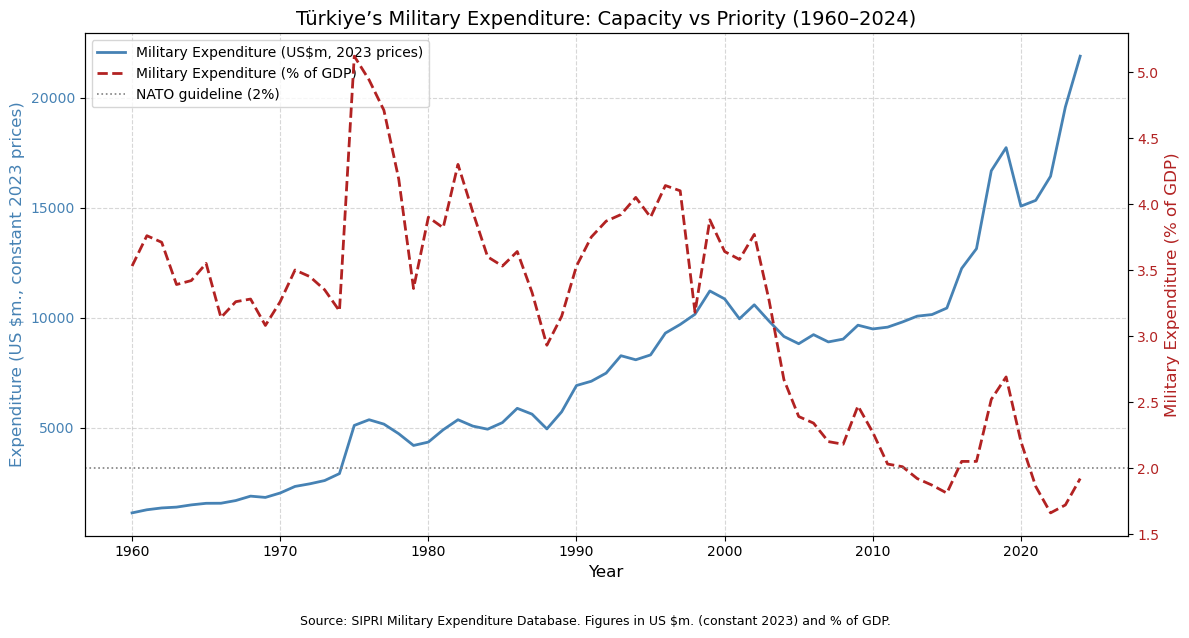

In [39]:
import matplotlib.pyplot as plt

# -----------------------------
# 1) Data → DataFrame
# -----------------------------
years = list(range(1960, 2025))
pct_str = [
    "3.53%","3.76%","3.71%","3.39%","3.42%","3.55%","3.14%","3.26%","3.28%","3.08%",
    "3.26%","3.50%","3.45%","3.35%","3.19%","5.12%","4.94%","4.71%","4.19%","3.36%",
    "3.90%","3.82%","4.30%","3.94%","3.60%","3.53%","3.64%","3.33%","2.93%","3.15%",
    "3.53%","3.75%","3.87%","3.92%","4.05%","3.90%","4.14%","4.10%","3.18%","3.88%",
    "3.64%","3.58%","3.77%","3.27%","2.67%","2.39%","2.34%","2.20%","2.18%","2.47%",
    "2.27%","2.03%","2.01%","1.92%","1.87%","1.81%","2.05%","2.05%","2.52%","2.69%",
    "2.20%","1.86%","1.66%","1.72%","1.92%"
]

df_gdp = pd.DataFrame({
    "Year": years,
    "Turkey_Milex_Share_GDP_pct": [float(s.strip("%")) for s in pct_str]
})

# === Load your data ===
data = {
    "Year": list(range(1953, 2025)),
    "Turkey_Milex_Constant2023_USD_millions": [
        1014.2, 1025.7, 1037.3, 960.4, 892.3, 866.7, 1031.4, 1137.3, 1278.7, 1361.9,
        1399.4, 1500.8, 1572.4, 1575.7, 1697.7, 1898.0, 1840.1, 2041.1, 2338.9, 2458.3,
        2606.4, 2922.2, 5110.3, 5369.1, 5169.7, 4733.9, 4200.3, 4353.4, 4911.7, 5369.5,
        5080.5, 4938.8, 5239.6, 5887.1, 5622.4, 4952.2, 5730.0, 6923.8, 7117.5, 7486.5,
        8277.2, 8092.6, 8313.6, 9304.4, 9697.1, 10161.0, 11219.2, 10857.7, 9953.5, 10590.5,
        9848.8, 9152.5, 8821.3, 9234.0, 8903.6, 9031.8, 9664.1, 9493.1, 9574.5, 9809.5,
        10074.2, 10147.7, 10442.0, 12242.6, 13140.2, 16678.6, 17729.8, 15070.4, 15333.9, 
        16429.0, 19577.8, 21884.4
    ]
}
df = pd.DataFrame(data)

# --- Merge the two datasets on Year ---
df_both = pd.merge(df, df_gdp, on="Year", how="inner")

# --- Plot with dual y-axis ---
fig, ax1 = plt.subplots(figsize=(12,6))

# Left axis: absolute spending in constant US$m
ax1.plot(df_both["Year"], df_both["Turkey_Milex_Constant2023_USD_millions"],
         color="steelblue", linewidth=2, label="Military Expenditure (US$m, 2023 prices)")
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Expenditure (US $m., constant 2023 prices)", color="steelblue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="steelblue")

# Right axis: share of GDP %
ax2 = ax1.twinx()
ax2.plot(df_both["Year"], df_both["Turkey_Milex_Share_GDP_pct"],
         color="firebrick", linewidth=2, linestyle="--", label="Military Expenditure (% of GDP)")
ax2.axhline(2.0, color="gray", linestyle=":", linewidth=1.2, label="NATO guideline (2%)")
ax2.set_ylabel("Military Expenditure (% of GDP)", color="firebrick", fontsize=12)
ax2.tick_params(axis="y", labelcolor="firebrick")

# --- Titles, grid, legend ---
plt.title("Türkiye’s Military Expenditure: Capacity vs Priority (1960–2024)", fontsize=14)
ax1.grid(True, linestyle="--", alpha=0.5)

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

# Source note
fig.text(
    0.5, -0.05,
    "Source: SIPRI Military Expenditure Database. Figures in US $m. (constant 2023) and % of GDP.",
    ha="center", fontsize=9
)

plt.tight_layout()
plt.show()


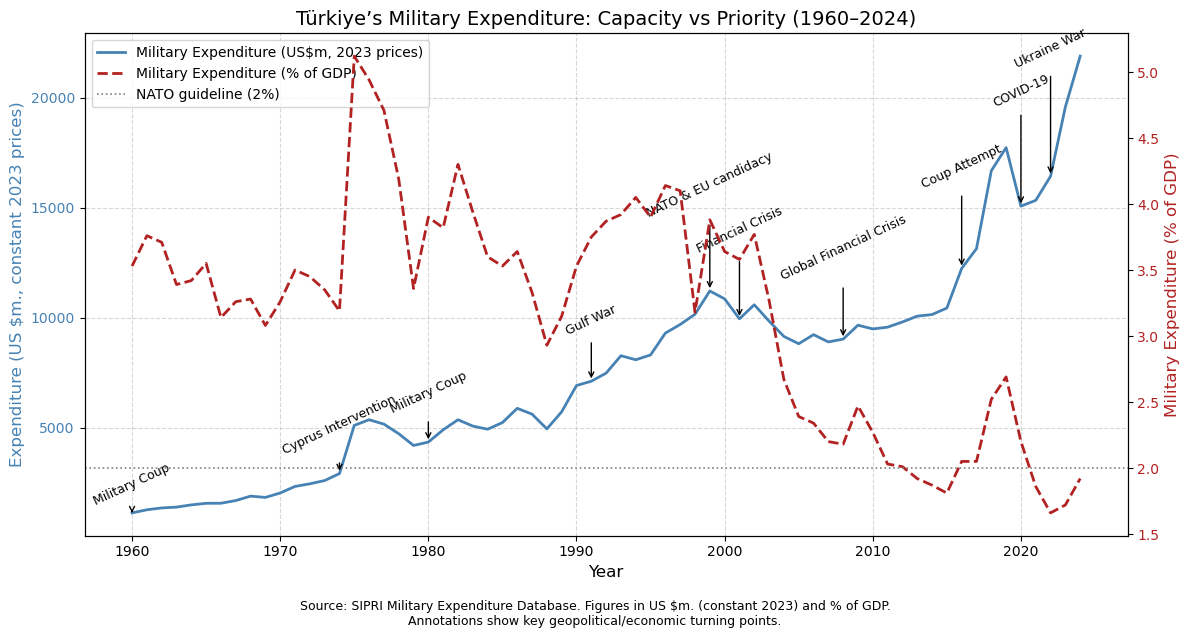

In [40]:
import matplotlib.pyplot as plt

# --- Merge datasets on Year ---
df_both = pd.merge(df, df_gdp, on="Year", how="inner")

# --- Plot with dual y-axis ---
fig, ax1 = plt.subplots(figsize=(12,6))

# Left axis: absolute spending (capacity)
ax1.plot(df_both["Year"], df_both["Turkey_Milex_Constant2023_USD_millions"],
         color="steelblue", linewidth=2, label="Military Expenditure (US$m, 2023 prices)")
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Expenditure (US $m., constant 2023 prices)", color="steelblue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="steelblue")

# Right axis: % of GDP (priority)
ax2 = ax1.twinx()
ax2.plot(df_both["Year"], df_both["Turkey_Milex_Share_GDP_pct"],
         color="firebrick", linewidth=2, linestyle="--", label="Military Expenditure (% of GDP)")
ax2.axhline(2.0, color="gray", linestyle=":", linewidth=1.2, label="NATO guideline (2%)")
ax2.set_ylabel("Military Expenditure (% of GDP)", color="firebrick", fontsize=12)
ax2.tick_params(axis="y", labelcolor="firebrick")

# --- Event markers ---
events = {
    1960: "Military Coup",
    1974: "Cyprus Intervention",
    1980: "Military Coup",
    1991: "Gulf War",
    1999: "NATO & EU candidacy",
    2001: "Financial Crisis",
    2008: "Global Financial Crisis",
    2016: "Coup Attempt",
    2020: "COVID-19",
    2022: "Ukraine War"
}
for year, label in events.items():
    if year in df_both["Year"].values:
        y_val = df_both.loc[df_both["Year"] == year, "Turkey_Milex_Constant2023_USD_millions"].values[0]
        ax1.annotate(label, xy=(year, y_val),
                     xytext=(year, y_val*1.3),
                     arrowprops=dict(facecolor="black", arrowstyle="->", lw=1),
                     fontsize=9, ha="center", rotation=25)

# --- Titles, grid, legend ---
plt.title("Türkiye’s Military Expenditure: Capacity vs Priority (1960–2024)", fontsize=14)
ax1.grid(True, linestyle="--", alpha=0.5)

# Merge legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

# Source note
fig.text(
    0.5, -0.05,
    "Source: SIPRI Military Expenditure Database. Figures in US $m. (constant 2023) and % of GDP.\nAnnotations show key geopolitical/economic turning points.",
    ha="center", fontsize=9
)

plt.tight_layout()
plt.show()


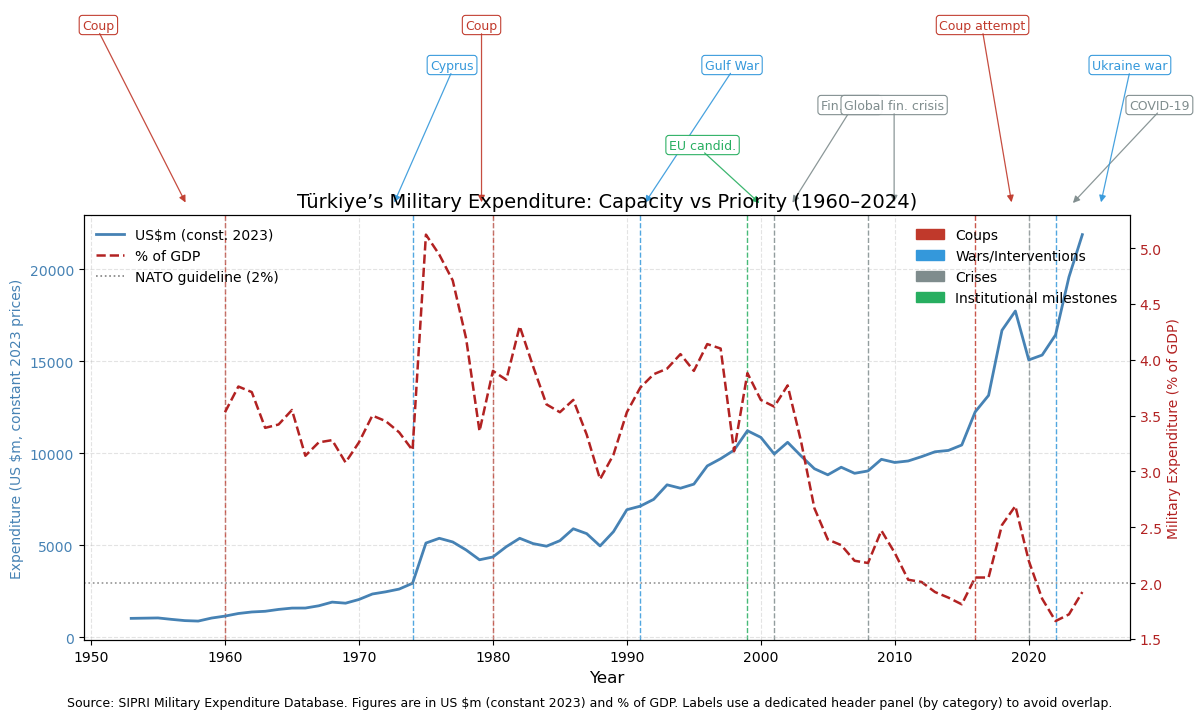

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec

# -----------------------------
# Data (% of GDP)
years_gdp = list(range(1960, 2025))
pct_str = [
    "3.53%","3.76%","3.71%","3.39%","3.42%","3.55%","3.14%","3.26%","3.28%","3.08%",
    "3.26%","3.50%","3.45%","3.35%","3.19%","5.12%","4.94%","4.71%","4.19%","3.36%",
    "3.90%","3.82%","4.30%","3.94%","3.60%","3.53%","3.64%","3.33%","2.93%","3.15%",
    "3.53%","3.75%","3.87%","3.92%","4.05%","3.90%","4.14%","4.10%","3.18%","3.88%",
    "3.64%","3.58%","3.77%","3.27%","2.67%","2.39%","2.34%","2.20%","2.18%","2.47%",
    "2.27%","2.03%","2.01%","1.92%","1.87%","1.81%","2.05%","2.05%","2.52%","2.69%",
    "2.20%","1.86%","1.66%","1.72%","1.92%"
]
df_gdp = pd.DataFrame({
    "Year": years_gdp,
    "Turkey_Milex_Share_GDP_pct": [float(s.strip("%")) for s in pct_str]
})

# Data (absolute, constant 2023 US$m)
df_abs = pd.DataFrame({
    "Year": list(range(1953, 2025)),
    "Turkey_Milex_Constant2023_USD_millions": [
        1014.2,1025.7,1037.3,960.4,892.3,866.7,1031.4,1137.3,1278.7,1361.9,
        1399.4,1500.8,1572.4,1575.7,1697.7,1898.0,1840.1,2041.1,2338.9,2458.3,
        2606.4,2922.2,5110.3,5369.1,5169.7,4733.9,4200.3,4353.4,4911.7,5369.5,
        5080.5,4938.8,5239.6,5887.1,5622.4,4952.2,5730.0,6923.8,7117.5,7486.5,
        8277.2,8092.6,8313.6,9304.4,9697.1,10161.0,11219.2,10857.7,9953.5,10590.5,
        9848.8,9152.5,8821.3,9234.0,8903.6,9031.8,9664.1,9493.1,9574.5,9809.5,
        10074.2,10147.7,10442.0,12242.6,13140.2,16678.6,17729.8,15070.4,15333.9,
        16429.0,19577.8,21884.4
    ]
})

# Merge
df = df_abs.merge(df_gdp, on="Year", how="left")
mask_pct = ~np.isnan(df["Turkey_Milex_Share_GDP_pct"])

# -----------------------------
# Figure with a taller header axis
# -----------------------------
fig = plt.figure(figsize=(13.5, 8.2))
gs  = GridSpec(nrows=2, ncols=1, height_ratios=[0.32, 0.68], hspace=0.02)

ax_top = fig.add_subplot(gs[0])     # header axis (labels only)
ax1    = fig.add_subplot(gs[1])     # main axis (data)

ax_top.set_xlim(df["Year"].min(), df["Year"].max())
ax_top.set_ylim(0, 1)
ax_top.axis("off")

# Left: absolute spending
line1, = ax1.plot(df["Year"], df["Turkey_Milex_Constant2023_USD_millions"],
                  color="steelblue", lw=2, label="US$m (const. 2023)")
ax1.set_ylabel("Expenditure (US $m, constant 2023 prices)", color="steelblue")
ax1.tick_params(axis='y', labelcolor="steelblue")
ax1.grid(True, ls="--", alpha=0.35)

# Right: % of GDP
ax2 = ax1.twinx()
line2, = ax2.plot(df.loc[mask_pct, "Year"], df.loc[mask_pct, "Turkey_Milex_Share_GDP_pct"],
                  ls="--", color="firebrick", lw=1.8, label="% of GDP")
ax2.set_ylabel("Military Expenditure (% of GDP)", color="firebrick")
ax2.tick_params(axis='y', labelcolor="firebrick")
ax2.axhline(2.0, color="grey", lw=1.2, ls=":", alpha=0.85)
nato_legend = Line2D([0], [0], color="grey", lw=1.2, ls=":", label="NATO guideline (2%)")

ax1.set_title("Türkiye’s Military Expenditure: Capacity vs Priority (1960–2024)", fontsize=14)
ax1.set_xlabel("Year", fontsize=12)

# -----------------------------
# Event definitions (with categories)
# cat ∈ {'coup','war','crisis','inst'}
# -----------------------------
events = [
    (1960, "Coup",            "coup"),
    (1974, "Cyprus",          "war"),
    (1980, "Coup",            "coup"),
    (1991, "Gulf War",        "war"),
    (1999, "EU candid.",      "inst"),
    (2001, "Fin. crisis",     "crisis"),
    (2008, "Global fin. crisis","crisis"),
    (2016, "Coup attempt",    "coup"),
    (2020, "COVID-19",        "crisis"),
    (2022, "Ukraine war",     "war"),
]

cat_color = {
    "coup":  "#c0392b",
    "war":   "#3498db",
    "crisis":"#7f8c8d",
    "inst":  "#27ae60",
}

# draw vertical lines in the main chart
for yr, _, cat in events:
    ax1.axvline(yr, color=cat_color[cat], ls="--", lw=1.0, alpha=0.85, zorder=0)

# lanes: one per category (top to bottom)
lane_y = {"coup":0.92, "war":0.72, "crisis":0.52, "inst":0.32}

# small, pre-set x-offsets per event to avoid collisions within each lane
xjit = {
    1960:-6, 1974:4, 1980:0, 1991:6, 1999:-4, 2001:4, 2008:0, 2016:-2, 2020:6, 2022:2
}

# label placement in the header axis with arrows down to the main axis
for yr, label, cat in events:
    y = lane_y[cat]
    x = yr + xjit.get(yr, 0)
    col = cat_color[cat]

    # label box
    ax_top.text(x, y, label, ha="center", va="center", fontsize=9, color=col,
                bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=col, lw=0.8, alpha=0.96),
                clip_on=False)

    # connector (from header label to event year at top of main plot)
    ax_top.annotate("",
        xy=(yr, 0.02), xycoords=("data", "axes fraction"),
        xytext=(x, y-0.03), textcoords=("data", "axes fraction"),
        arrowprops=dict(arrowstyle="-|>", color=col, lw=0.9, alpha=0.9))

# Legends
series_legend = ax1.legend(handles=[line1, line2, nato_legend], loc="upper left", frameon=False)
ax1.add_artist(series_legend)
event_handles = [
    Patch(facecolor=cat_color["coup"],  edgecolor=cat_color["coup"],  label="Coups"),
    Patch(facecolor=cat_color["war"],   edgecolor=cat_color["war"],   label="Wars/Interventions"),
    Patch(facecolor=cat_color["crisis"],edgecolor=cat_color["crisis"],label="Crises"),
    Patch(facecolor=cat_color["inst"],  edgecolor=cat_color["inst"],  label="Institutional milestones"),
]
ax1.legend(handles=event_handles, loc="upper right", frameon=False)

# Source note
fig.text(0.5, 0.03,
         "Source: SIPRI Military Expenditure Database. Figures are in US $m (constant 2023) and % of GDP. "
         "Labels use a dedicated header panel (by category) to avoid overlap.",
         ha="center", fontsize=9)

plt.show()


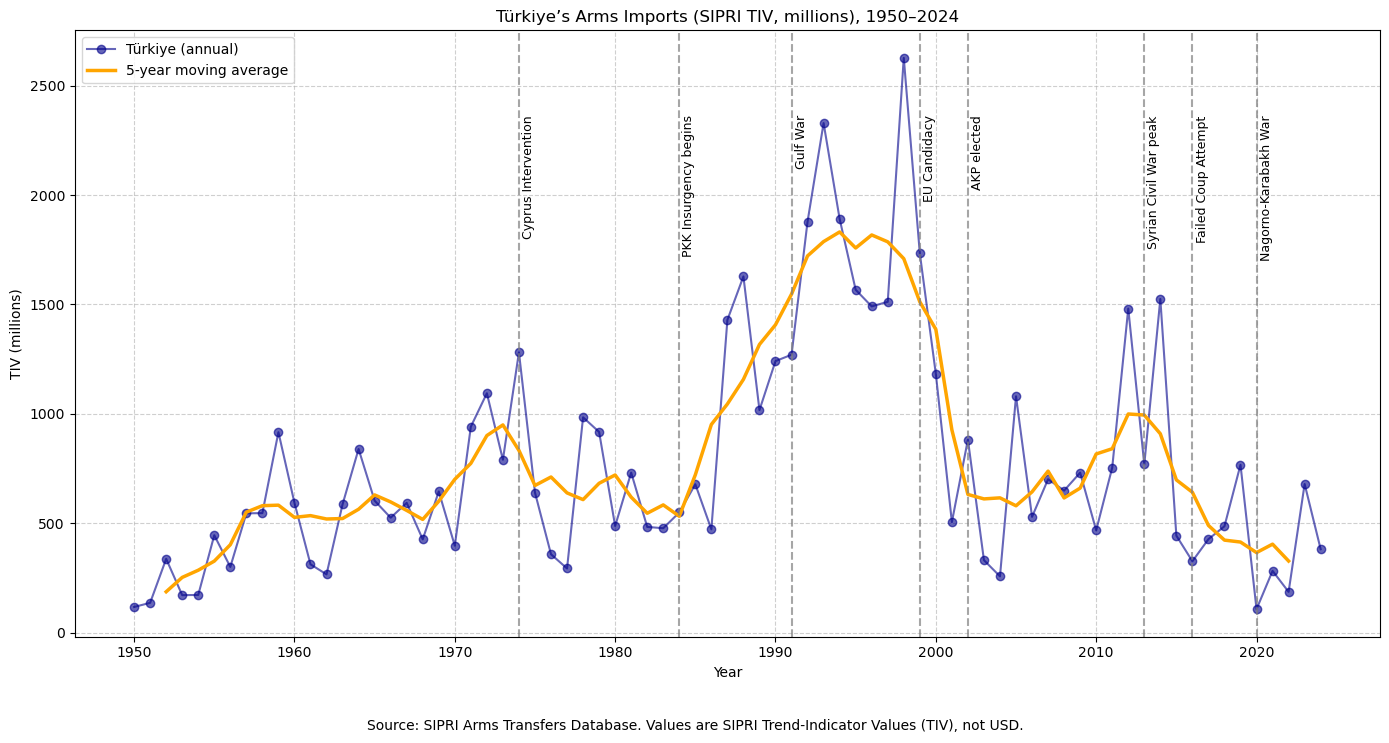

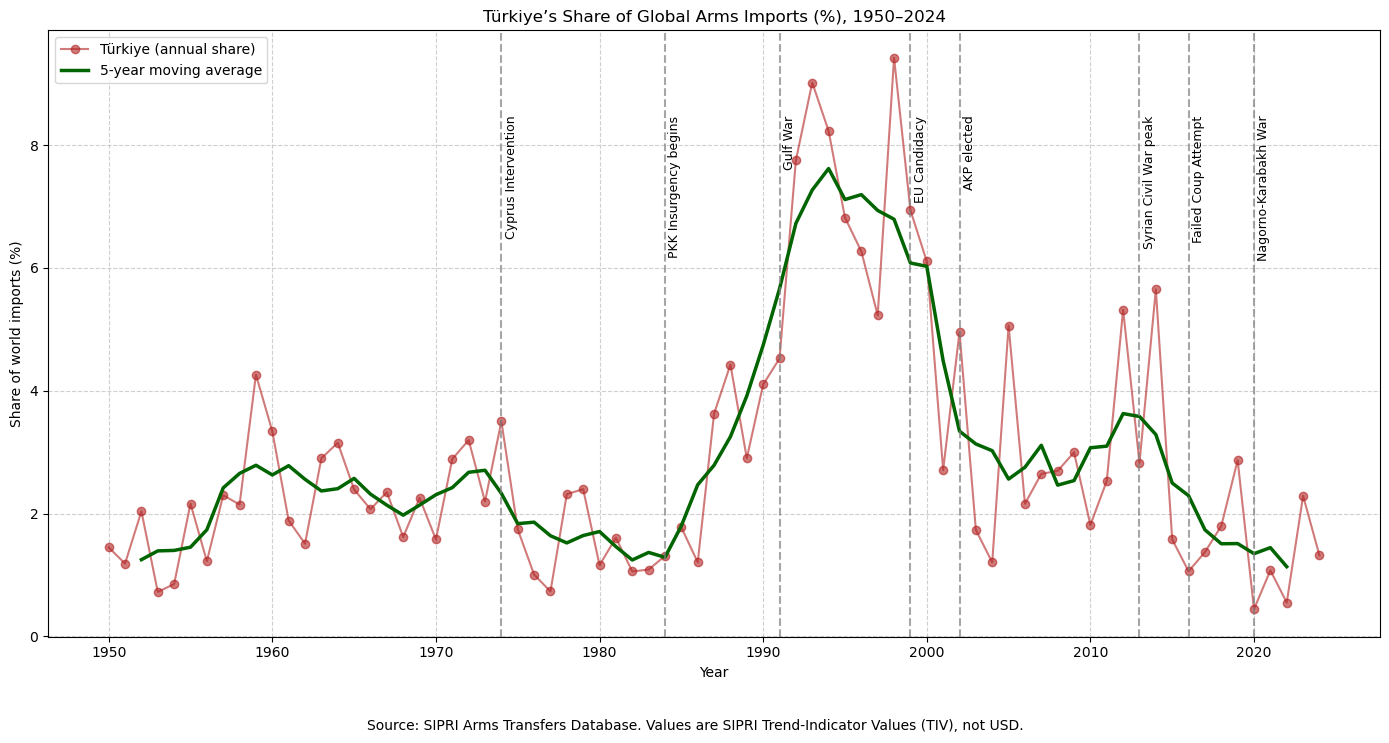

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the dataset
data = {
    "Year": list(range(1950, 2025)),
    "Turkiye_Imports_TIV_millions": [
        117, 136, 337, 171, 172, 445, 300, 545, 546, 916, 593, 312, 266, 586, 839, 603, 525, 593, 
        426, 645, 397, 941, 1094, 790, 1281, 640, 358, 293, 984, 917, 487, 731, 483, 477, 549, 678, 
        472, 1429, 1628, 1017, 1241, 1270, 1879, 2329, 1891, 1567, 1491, 1512, 2627, 1734, 1182, 505, 
        882, 331, 257, 1080, 529, 701, 649, 731, 467, 754, 1481, 769, 1525, 443, 326, 427, 486, 767, 
        107, 282, 186, 679, 381
    ],
    "World_Imports_TIV_millions": [
        8082, 11484, 16552, 23648, 20217, 20584, 24542, 23721, 25447, 21499, 17759, 16544, 17630, 
        20216, 26618, 25217, 25359, 25265, 26334, 28625, 25173, 32589, 34237, 35986, 36594, 36733, 
        35610, 40098, 42492, 38271, 42029, 45540, 45731, 43886, 41938, 38235, 39133, 39412, 36785, 
        35070, 30260, 28069, 24236, 25826, 22978, 22982, 23783, 28917, 27888, 24986, 19363, 18659, 
        17794, 19103, 21346, 21338, 24500, 26498, 24082, 24400, 25750, 29801, 27845, 27225, 26995, 
        28075, 30794, 31140, 27040, 26750, 24194, 26263, 33871, 29683, 28938
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Add Türkiye's share of world imports (%)
df["Turkiye_Share_%"] = (df["Turkiye_Imports_TIV_millions"] / df["World_Imports_TIV_millions"]) * 100

# Add 5-year moving averages
df["Turkiye_Imports_MA5"] = df["Turkiye_Imports_TIV_millions"].rolling(window=5, center=True).mean()
df["Turkiye_Share_MA5"] = df["Turkiye_Share_%"].rolling(window=5, center=True).mean()

# --- Key Events for annotation ---
events = {
    1974: "Cyprus Intervention",
    1984: "PKK Insurgency begins",
    1991: "Gulf War",
    1999: "EU Candidacy",
    2002: "AKP elected",
    2013: "Syrian Civil War peak",
    2016: "Failed Coup Attempt",
    2020: "Nagorno-Karabakh War"
}

# --- 1) Türkiye imports (TIV, millions) with MA5 + Events ---
plt.figure(figsize=(14,7))
plt.plot(df["Year"], df["Turkiye_Imports_TIV_millions"], marker="o", linewidth=1.5, color="darkblue", alpha=0.6, label="Türkiye (annual)")
plt.plot(df["Year"], df["Turkiye_Imports_MA5"], linewidth=2.5, color="orange", label="5-year moving average")

# Annotate events
for year, label in events.items():
    plt.axvline(x=year, color="grey", linestyle="--", alpha=0.7)
    plt.text(year+0.2, max(df["Turkiye_Imports_TIV_millions"])*0.9, label, rotation=90, fontsize=9, color="black", va="top")

plt.title("Türkiye’s Arms Imports (SIPRI TIV, millions), 1950–2024")
plt.xlabel("Year")
plt.ylabel("TIV (millions)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.figtext(
    0.5, -0.05,
    "Source: SIPRI Arms Transfers Database. Values are SIPRI Trend-Indicator Values (TIV), not USD.",
    ha="center", wrap=True, fontsize=10
)
plt.tight_layout()
plt.show()

# --- 2) Türkiye's share of world imports (%) with MA5 + Events ---
plt.figure(figsize=(14,7))
plt.plot(df["Year"], df["Turkiye_Share_%"], marker="o", linewidth=1.5, color="firebrick", alpha=0.6, label="Türkiye (annual share)")
plt.plot(df["Year"], df["Turkiye_Share_MA5"], linewidth=2.5, color="darkgreen", label="5-year moving average")

# Annotate events
for year, label in events.items():
    plt.axvline(x=year, color="grey", linestyle="--", alpha=0.7)
    plt.text(year+0.2, max(df["Turkiye_Share_%"])*0.9, label, rotation=90, fontsize=9, color="black", va="top")

plt.title("Türkiye’s Share of Global Arms Imports (%), 1950–2024")
plt.xlabel("Year")
plt.ylabel("Share of world imports (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.figtext(
    0.5, -0.05,
    "Source: SIPRI Arms Transfers Database. Values are SIPRI Trend-Indicator Values (TIV), not USD.",
    ha="center", wrap=True, fontsize=10
)
plt.tight_layout()
plt.show()


   Year  Turkiye_Exports_TIV_millions  World_Exports_TIV_millions  \
0  1995                             3                       22982   
1  1996                             3                       23783   
2  1997                             0                       28917   
3  1998                             3                       27888   
4  1999                            44                       24986   

   Turkiye_Share_%  Turkiye_Exports_MA5  Turkiye_Share_MA5  
0         0.013054                 3.00           0.013054  
1         0.012614                 3.00           0.012834  
2         0.000000                 2.00           0.008556  
3         0.010757                 2.25           0.009106  
4         0.176099                10.60           0.042505  


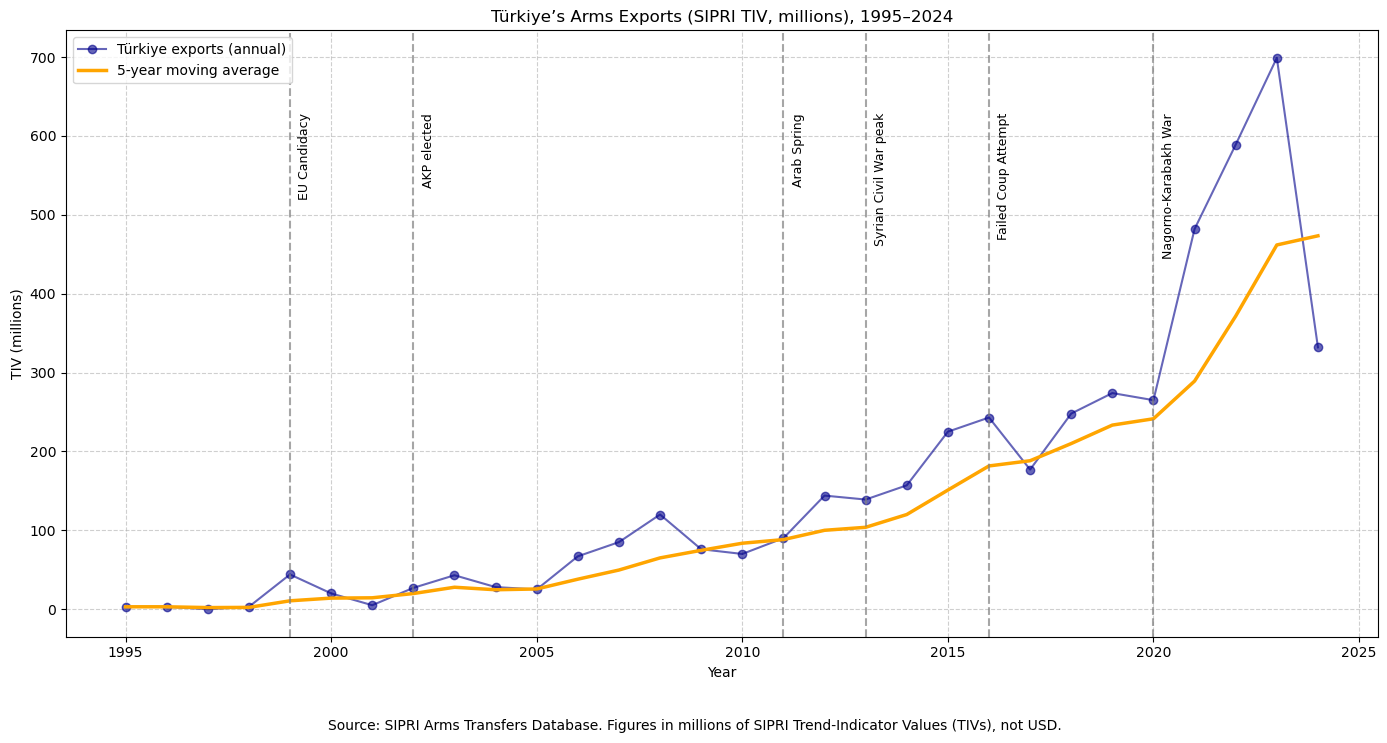

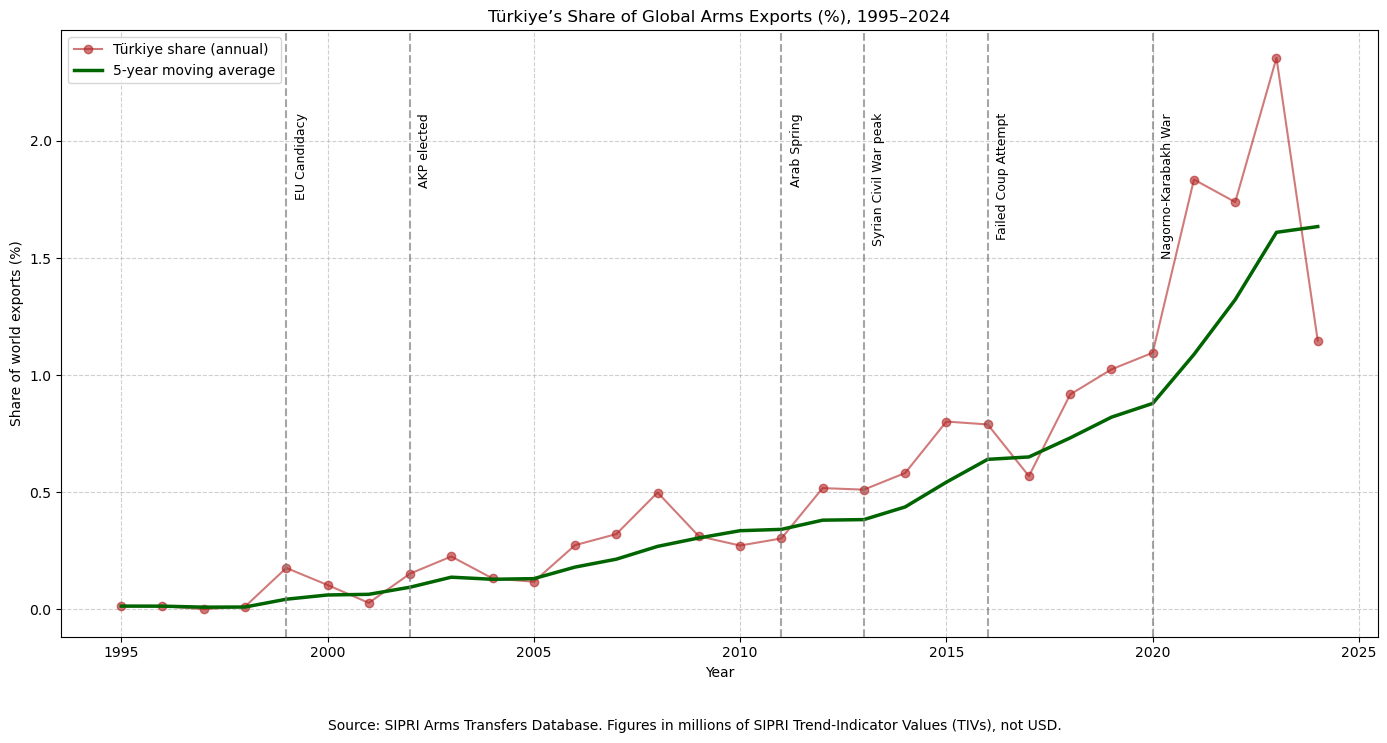

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Dataset ---
data = {
    "Year": list(range(1995, 2025)),
    "Turkiye_Exports_TIV_millions": [
        3, 3, 0, 3, 44, 20, 5, 27, 43, 28, 25, 67, 85, 120, 76, 70, 90, 144, 139, 157,
        225, 243, 177, 248, 274, 265, 482, 589, 699, 332
    ],
    "World_Exports_TIV_millions": [
        22982, 23783, 28917, 27888, 24986, 19363, 18659, 17794, 19103, 21346,
        21338, 24500, 26498, 24082, 24400, 25750, 29801, 27845, 27225, 26995,
        28075, 30794, 31140, 27040, 26750, 24194, 26263, 33871, 29683, 28938
    ]
}

# --- Create DataFrame ---
df_exp = pd.DataFrame(data)

# Add Turkey’s share of world exports (%)
df_exp["Turkiye_Share_%"] = (df_exp["Turkiye_Exports_TIV_millions"] /
                             df_exp["World_Exports_TIV_millions"]) * 100

# Add 5-year moving averages
df_exp["Turkiye_Exports_MA5"] = df_exp["Turkiye_Exports_TIV_millions"].rolling(5, min_periods=1).mean()
df_exp["Turkiye_Share_MA5"] = df_exp["Turkiye_Share_%"].rolling(5, min_periods=1).mean()

print(df_exp.head())

# --- Key Events for annotation (post-1995 only) ---
events = {
    1999: "EU Candidacy",
    2002: "AKP elected",
    2011: "Arab Spring",
    2013: "Syrian Civil War peak",
    2016: "Failed Coup Attempt",
    2020: "Nagorno-Karabakh War"
}

# --- 1) Turkey’s exports (TIV, millions) with MA5 ---
plt.figure(figsize=(14,7))
plt.plot(df_exp["Year"], df_exp["Turkiye_Exports_TIV_millions"], marker="o", linewidth=1.5,
         color="darkblue", alpha=0.6, label="Türkiye exports (annual)")
plt.plot(df_exp["Year"], df_exp["Turkiye_Exports_MA5"], linewidth=2.5,
         color="orange", label="5-year moving average")

# Annotate events
for year, label in events.items():
    plt.axvline(x=year, color="grey", linestyle="--", alpha=0.7)
    plt.text(year+0.2, max(df_exp["Turkiye_Exports_TIV_millions"])*0.9,
             label, rotation=90, fontsize=9, color="black", va="top")

plt.title("Türkiye’s Arms Exports (SIPRI TIV, millions), 1995–2024")
plt.xlabel("Year")
plt.ylabel("TIV (millions)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.figtext(
    0.5, -0.05,
    "Source: SIPRI Arms Transfers Database. Figures in millions of SIPRI Trend-Indicator Values (TIVs), not USD.",
    ha="center", wrap=True, fontsize=10
)
plt.tight_layout()
plt.savefig("turkiye_exports_TIV_MA5.png", dpi=300, bbox_inches="tight")
plt.show()

# --- 2) Turkey’s share of world exports (%) with MA5 ---
plt.figure(figsize=(14,7))
plt.plot(df_exp["Year"], df_exp["Turkiye_Share_%"], marker="o", linewidth=1.5,
         color="firebrick", alpha=0.6, label="Türkiye share (annual)")
plt.plot(df_exp["Year"], df_exp["Turkiye_Share_MA5"], linewidth=2.5,
         color="darkgreen", label="5-year moving average")

# Annotate events
for year, label in events.items():
    plt.axvline(x=year, color="grey", linestyle="--", alpha=0.7)
    plt.text(year+0.2, max(df_exp["Turkiye_Share_%"])*0.9,
             label, rotation=90, fontsize=9, color="black", va="top")

plt.title("Türkiye’s Share of Global Arms Exports (%), 1995–2024")
plt.xlabel("Year")
plt.ylabel("Share of world exports (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.figtext(
    0.5, -0.05,
    "Source: SIPRI Arms Transfers Database. Figures in millions of SIPRI Trend-Indicator Values (TIVs), not USD.",
    ha="center", wrap=True, fontsize=10
)
plt.tight_layout()
plt.savefig("turkiye_share_world_exports_percent_MA5.png", dpi=300, bbox_inches="tight")
plt.show()
